In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict

/home/alex/NuMI/PELEE/


## NEUTRINO ENERGY

In [2]:
#Load in Neutrino Energy Truth Values

nue_nue_vars_tot_df_truth = pd.read_csv("nue_nue_varstot_full_catsel_nopions_trueE.csv")
nue_nue_weights_tot_df_truth = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_trueE.csv")

nue_nue_vars_tot_truth = defaultdict(list)
nue_nue_weights_tot_truth = defaultdict(list)


nue_nue_vars_tot_truth = nue_nue_vars_tot_df_truth.to_dict()
nue_nue_weights_tot_truth = nue_nue_weights_tot_df_truth.to_dict()
nue_nue_vars_tot_truth.pop("Unnamed: 0")
nue_nue_weights_tot_truth.pop("Unnamed: 0")

poplist = []

for c in nue_nue_vars_tot_truth.keys():
    if len(nue_nue_weights_tot_truth[c][0]) > 2:
        nue_nue_weights_tot_truth[c][0] = nue_nue_weights_tot_truth[c][0][1:]
        nue_nue_weights_tot_truth[c][0] = nue_nue_weights_tot_truth[c][0][:-1]
        nue_nue_weights_tot_truth[c][0] = list(map(float,nue_nue_weights_tot_truth[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_nue_vars_tot_truth.keys():
    if len(nue_nue_vars_tot_truth[c][0]) > 2:
        nue_nue_vars_tot_truth[c][0] = nue_nue_vars_tot_truth[c][0][1:]
        nue_nue_vars_tot_truth[c][0] = nue_nue_vars_tot_truth[c][0][:-1]
        nue_nue_vars_tot_truth[c][0] = list(map(float,nue_nue_vars_tot_truth[c][0].split(",")))
        
for i in poplist:
    nue_nue_vars_tot.pop(i)
    nue_nue_weights_tot.pop(i)
    
###############################################################

###############################################################

numu_mc_vars_tot_df_truth = pd.read_csv("numu_mc_varstot_full_catsel_nopions_trueE.csv")
numu_mc_weights_tot_df_truth = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_trueE.csv")

numu_mc_vars_tot_truth = defaultdict(list)
numu_mc_weights_tot_truth = defaultdict(list)


numu_mc_vars_tot_truth = numu_mc_vars_tot_df_truth.to_dict()
numu_mc_weights_tot_truth = numu_mc_weights_tot_df_truth.to_dict()
numu_mc_vars_tot_truth.pop("Unnamed: 0")
numu_mc_weights_tot_truth.pop("Unnamed: 0")

poplist = []

for c in numu_mc_vars_tot_truth.keys():
    if len(numu_mc_weights_tot_truth[c][0]) > 2:
        numu_mc_weights_tot_truth[c][0] = numu_mc_weights_tot_truth[c][0][1:]
        numu_mc_weights_tot_truth[c][0] = numu_mc_weights_tot_truth[c][0][:-1]
        numu_mc_weights_tot_truth[c][0] = list(map(float,numu_mc_weights_tot_truth[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_mc_vars_tot_truth.keys():
    if len(numu_mc_vars_tot_truth[c][0]) > 2:
        numu_mc_vars_tot_truth[c][0] = numu_mc_vars_tot_truth[c][0][1:]
        numu_mc_vars_tot_truth[c][0] = numu_mc_vars_tot_truth[c][0][:-1]
        numu_mc_vars_tot_truth[c][0] = list(map(float,numu_mc_vars_tot_truth[c][0].split(",")))
        
for i in poplist:
    numu_mc_vars_tot_truth.pop(i)
    numu_mc_weights_tot_truth.pop(i)
    
###############################################################


In [3]:
#Load in Neutrino Energy Reconstructed Values

nue_nue_vars_tot_df_reco = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection.csv")
nue_nue_weights_tot_df_reco = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection.csv")

nue_nue_vars_tot_reco = defaultdict(list)
nue_nue_weights_tot_reco = defaultdict(list)


nue_nue_vars_tot_reco = nue_nue_vars_tot_df_reco.to_dict()
nue_nue_weights_tot_reco = nue_nue_weights_tot_df_reco.to_dict()
nue_nue_vars_tot_reco.pop("Unnamed: 0")
nue_nue_weights_tot_reco.pop("Unnamed: 0")

poplist = []

for c in nue_nue_vars_tot_reco.keys():
    if len(nue_nue_weights_tot_reco[c][0]) > 2:
        nue_nue_weights_tot_reco[c][0] = nue_nue_weights_tot_reco[c][0][1:]
        nue_nue_weights_tot_reco[c][0] = nue_nue_weights_tot_reco[c][0][:-1]
        nue_nue_weights_tot_reco[c][0] = list(map(float,nue_nue_weights_tot_reco[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_nue_vars_tot_reco.keys():
    if len(nue_nue_vars_tot_reco[c][0]) > 2:
        nue_nue_vars_tot_reco[c][0] = nue_nue_vars_tot_reco[c][0][1:]
        nue_nue_vars_tot_reco[c][0] = nue_nue_vars_tot_reco[c][0][:-1]
        nue_nue_vars_tot_reco[c][0] = list(map(float,nue_nue_vars_tot_reco[c][0].split(",")))
        
for i in poplist:
    nue_nue_vars_tot_reco.pop(i)
    nue_nue_weights_tot_reco.pop(i)
    
###############################################################

nue_mc_vars_tot_df_reco = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection.csv")
nue_mc_weights_tot_df_reco = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection.csv")

nue_mc_vars_tot_reco = defaultdict(list)
nue_mc_weights_tot_reco = defaultdict(list)


nue_mc_vars_tot_reco = nue_mc_vars_tot_df_reco.to_dict()
nue_mc_weights_tot_reco = nue_mc_weights_tot_df_reco.to_dict()
nue_mc_vars_tot_reco.pop("Unnamed: 0")
nue_mc_weights_tot_reco.pop("Unnamed: 0")

poplist = []

for c in nue_mc_vars_tot_reco.keys():
    if len(nue_mc_weights_tot_reco[c][0]) > 2:
        nue_mc_weights_tot_reco[c][0] = nue_mc_weights_tot_reco[c][0][1:]
        nue_mc_weights_tot_reco[c][0] = nue_mc_weights_tot_reco[c][0][:-1]
        nue_mc_weights_tot_reco[c][0] = list(map(float,nue_mc_weights_tot_reco[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_mc_vars_tot_reco.keys():
    if len(nue_mc_vars_tot_reco[c][0]) > 2:
        nue_mc_vars_tot_reco[c][0] = nue_mc_vars_tot_reco[c][0][1:]
        nue_mc_vars_tot_reco[c][0] = nue_mc_vars_tot_reco[c][0][:-1]
        nue_mc_vars_tot_reco[c][0] = list(map(float,nue_mc_vars_tot_reco[c][0].split(",")))
        
for i in poplist:
    nue_mc_vars_tot_reco.pop(i)
    nue_mc_weights_tot_reco.pop(i)
    
###############################################################

nue_dirt_vars_tot_df_reco = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection.csv")
nue_dirt_weights_tot_df_reco = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection.csv")

nue_dirt_vars_tot_reco = defaultdict(list)
nue_dirt_weights_tot_reco = defaultdict(list)


nue_dirt_vars_tot_reco = nue_dirt_vars_tot_df_reco.to_dict()
nue_dirt_weights_tot_reco = nue_dirt_weights_tot_df_reco.to_dict()
nue_dirt_vars_tot_reco.pop("Unnamed: 0")
nue_dirt_weights_tot_reco.pop("Unnamed: 0")

#print(nue_dirt_vars_tot[c][0])

poplist = []

for c in nue_dirt_vars_tot_reco.keys():
    if len(nue_dirt_weights_tot_reco[c][0]) > 2:
        nue_dirt_weights_tot_reco[c][0] = nue_dirt_weights_tot_reco[c][0][1:]
        nue_dirt_weights_tot_reco[c][0] = nue_dirt_weights_tot_reco[c][0][:-1]
        nue_dirt_weights_tot_reco[c][0] = list(map(float,nue_dirt_weights_tot_reco[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_dirt_vars_tot_reco.keys():
    if len(nue_dirt_vars_tot_reco[c][0]) > 2:
        nue_dirt_vars_tot_reco[c][0] = nue_dirt_vars_tot_reco[c][0][1:]
        nue_dirt_vars_tot_reco[c][0] = nue_dirt_vars_tot_reco[c][0][:-1]
        nue_dirt_vars_tot_reco[c][0] = list(map(float,nue_dirt_vars_tot_reco[c][0].split(",")))
        
for i in poplist:
    nue_dirt_vars_tot_reco.pop(i)
    nue_dirt_weights_tot_reco.pop(i)
    
print(nue_dirt_vars_tot_reco)
    
###############################################################

nue_ext_vars_tot_df_reco = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection.csv")
nue_ext_weights_tot_df_reco = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection.csv")

nue_ext_vars_tot_reco = defaultdict(list)
nue_ext_weights_tot_reco = defaultdict(list)


nue_ext_vars_tot_reco = nue_ext_vars_tot_df_reco.to_dict()
nue_ext_weights_tot_reco = nue_ext_weights_tot_df_reco.to_dict()
nue_ext_vars_tot_reco.pop("Unnamed: 0")
nue_ext_weights_tot_reco.pop("Unnamed: 0")

#print(nue_ext_vars_tot)
"""
poplist = []

for c in nue_ext_vars_tot.keys():
    poplist.append(c)
        
for i in poplist:
    nue_ext_vars_tot.pop(i)
    nue_ext_weights_tot.pop(i)
    
print(nue_ext_vars_tot)
"""

###############################################################

nue_data_vars_tot_df_reco = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection.csv")
nue_data_weights_tot_df_reco = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection.csv")

nue_data_vars_tot_reco = defaultdict(list)
nue_data_weights_tot_reco = defaultdict(list)


nue_data_vars_tot_reco = nue_data_vars_tot_df_reco.to_dict()
nue_data_weights_tot_reco = nue_data_weights_tot_df_reco.to_dict()
nue_data_vars_tot_reco.pop("Unnamed: 0")
nue_data_weights_tot_reco.pop("Unnamed: 0")

print(nue_data_vars_tot_reco)
"""
poplist = []

for c in nue_ext_vars_tot.keys():
    poplist.append(c)
        
for i in poplist:
    nue_ext_vars_tot.pop(i)
    nue_ext_weights_tot.pop(i)
    
print(nue_ext_vars_tot)
"""

###############################################################

numu_mc_vars_tot_df_reco = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection.csv")
numu_mc_weights_tot_df_reco = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection.csv")

numu_mc_vars_tot_reco = defaultdict(list)
numu_mc_weights_tot_reco = defaultdict(list)


numu_mc_vars_tot_reco = numu_mc_vars_tot_df_reco.to_dict()
numu_mc_weights_tot_reco = numu_mc_weights_tot_df_reco.to_dict()
numu_mc_vars_tot_reco.pop("Unnamed: 0")
numu_mc_weights_tot_reco.pop("Unnamed: 0")

poplist = []

for c in numu_mc_vars_tot_reco.keys():
    if len(numu_mc_weights_tot_reco[c][0]) > 2:
        numu_mc_weights_tot_reco[c][0] = numu_mc_weights_tot_reco[c][0][1:]
        numu_mc_weights_tot_reco[c][0] = numu_mc_weights_tot_reco[c][0][:-1]
        numu_mc_weights_tot_reco[c][0] = list(map(float,numu_mc_weights_tot_reco[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_mc_vars_tot_reco.keys():
    if len(numu_mc_vars_tot_reco[c][0]) > 2:
        numu_mc_vars_tot_reco[c][0] = numu_mc_vars_tot_reco[c][0][1:]
        numu_mc_vars_tot_reco[c][0] = numu_mc_vars_tot_reco[c][0][:-1]
        numu_mc_vars_tot_reco[c][0] = list(map(float,numu_mc_vars_tot_reco[c][0].split(",")))
        
for i in poplist:
    numu_mc_vars_tot_reco.pop(i)
    numu_mc_weights_tot_reco.pop(i)
    
###############################################################

numu_dirt_vars_tot_df_reco = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection.csv")
numu_dirt_weights_tot_df_reco = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection.csv")

numu_dirt_vars_tot_reco = defaultdict(list)
numu_dirt_weights_tot_reco = defaultdict(list)


numu_dirt_vars_tot_reco = numu_dirt_vars_tot_df_reco.to_dict()
numu_dirt_weights_tot_reco = numu_dirt_weights_tot_df_reco.to_dict()
numu_dirt_vars_tot_reco.pop("Unnamed: 0")
numu_dirt_weights_tot_reco.pop("Unnamed: 0")

poplist = []

for c in numu_dirt_vars_tot_reco.keys():
    if len(numu_dirt_weights_tot_reco[c][0]) > 2:
        numu_dirt_weights_tot_reco[c][0] = numu_dirt_weights_tot_reco[c][0][1:]
        numu_dirt_weights_tot_reco[c][0] = numu_dirt_weights_tot_reco[c][0][:-1]
        numu_dirt_weights_tot_reco[c][0] = list(map(float,numu_dirt_weights_tot_reco[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_dirt_vars_tot_reco.keys():
    if len(numu_dirt_vars_tot_reco[c][0]) > 2:
        numu_dirt_vars_tot_reco[c][0] = numu_dirt_vars_tot_reco[c][0][1:]
        numu_dirt_vars_tot_reco[c][0] = numu_dirt_vars_tot_reco[c][0][:-1]
        numu_dirt_vars_tot_reco[c][0] = list(map(float,numu_dirt_vars_tot_reco[c][0].split(",")))
        
for i in poplist:
    numu_dirt_vars_tot_reco.pop(i)
    numu_dirt_weights_tot_reco.pop(i) 
    
###############################################################

numu_ext_vars_tot_df_reco = pd.read_csv("numu_ext_varstot_full_catsel_nopions_recoE_usingSelection.csv")
numu_ext_weights_tot_df_reco = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection.csv")

numu_ext_vars_tot_reco = defaultdict(list)
numu_ext_weights_tot_reco = defaultdict(list)

numu_ext_vars_tot_reco = numu_ext_vars_tot_df_reco.to_dict()
numu_ext_weights_tot_reco = numu_ext_weights_tot_df_reco.to_dict()
numu_ext_vars_tot_reco.pop("Unnamed: 0")
numu_ext_weights_tot_reco.pop("Unnamed: 0")

    
###############################################################

numu_data_vars_tot_df_reco = pd.read_csv("numu_data_varstot_full_catsel_nopions_recoE_usingSelection.csv")
numu_data_weights_tot_df_reco = pd.read_csv("numu_data_weightstot_full_catsel_nopions_recoE_usingSelection.csv")

numu_data_vars_tot_reco = defaultdict(list)
numu_data_weights_tot_reco= defaultdict(list)


numu_data_vars_tot_reco = numu_data_vars_tot_df_reco.to_dict()
numu_data_weights_tot_reco = numu_data_weights_tot_df_reco.to_dict()
numu_data_vars_tot_reco.pop("Unnamed: 0")
numu_data_weights_tot_reco.pop("Unnamed: 0")

print(numu_data_vars_tot_reco)

{'4': {0: [0.25621253]}}
{'0': {0: 21, 1: 26, 2: 7, 3: 4, 4: 2, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0}}
{'0': {0: 820, 1: 1053, 2: 380, 3: 117, 4: 39, 5: 13, 6: 4, 7: 2, 8: 5, 9: 0}}


[ 30.08481083 151.62865505 111.03931566  43.90048764  16.85484445
   8.27149273   4.82925683   2.50250452   1.27365342   0.50065524]


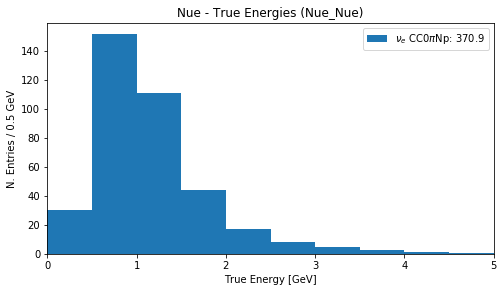

In [4]:
#Plot the truth data for nue

category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}

    
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(nue_nue_weights_tot_truth[str(c)][0])) \
            if sum(nue_nue_weights_tot_truth[str(c)][0]) else ""
            for c in nue_nue_vars_tot_truth.keys()
        ]


pup = list(nue_nue_vars_tot_truth.values())

i = 0
for c in nue_nue_vars_tot_truth.keys():
    nue_nue_vars_tot_truth[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot_truth.values())

i = 0
for c in nue_nue_weights_tot_truth.keys():
    nue_nue_weights_tot_truth[str(c)] = pup2[i][0]
    i = i + 1
        


nue_fig_truth = plt.figure(figsize=(8, 7))
nue_gs_truth = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1_truth = plt.subplot(nue_gs_truth[0])
nue_ax1_truth.set_xlim([0, 5])

VARIABLE, BINS, RANGE, XTIT = 'nu_e',10,(0.0, 5.0),"True Energy [GeV]"

nue_stacked_truth = nue_ax1_truth.hist(
            nue_nue_vars_tot_truth.values(),
            weights=list(nue_nue_weights_tot_truth.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

#CATSEL
print(nue_stacked_truth[0])
n_nue_tot = nue_stacked_truth[0]

plt.title("Nue - True Energies (Nue_Nue)")
plt.xlabel("True Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [5]:
nue_wanted_list_truth = n_nue_tot

dict_values([21, 26, 7, 4, 2, 0, 0, 1, 0, 0])
<class 'dict_values'>


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


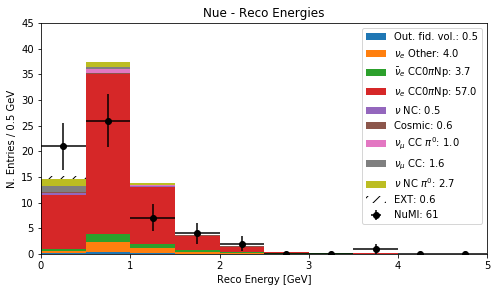

In [6]:
#Plot reco data for nue

category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}


########################################
pup = list(nue_nue_vars_tot_reco.values())

i = 0
for c in nue_nue_vars_tot_reco.keys():
    nue_nue_vars_tot_reco[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot_reco.values())

i = 0
for c in nue_nue_weights_tot_reco.keys():
    nue_nue_weights_tot_reco[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot_reco.values())

i = 0
for c in nue_mc_vars_tot_reco.keys():
    nue_mc_vars_tot_reco[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot_reco.values())

i = 0
for c in nue_mc_weights_tot_reco.keys():
    nue_mc_weights_tot_reco[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot_reco.values())

i = 0
for c in nue_dirt_vars_tot_reco.keys():
    nue_dirt_vars_tot_reco[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot_reco.values())

i = 0
for c in nue_dirt_weights_tot_reco.keys():
    nue_dirt_weights_tot_reco[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_vars_tot_reco, nue_mc_vars_tot_reco, nue_dirt_vars_tot_reco]
weightss = [nue_nue_weights_tot_reco, nue_mc_weights_tot_reco, nue_dirt_weights_tot_reco]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_fig_reco = plt.figure(figsize=(8, 7))
nue_gs_reco = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1_reco = plt.subplot(nue_gs_truth[0])
nue_ax1_reco.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'nu_e',10,(0.0, 5.0),"Reco Energy [GeV]"

nue_stacked_reco = nue_ax1_reco.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked_reco[0][-1])

n_ext_nue, ext_bins, patches = nue_ax1_reco.hist(
            nue_ext_vars_tot_reco[str(0)][0],
            weights=nue_ext_weights_tot_reco[str(0)][0],
            bottom=current_total_hist,
            label="EXT: %.1f" % (nue_ext_weights_tot_reco[str(0)][0]) if (nue_ext_weights_tot_reco[str(0)][0]) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

nue_ax1_reco.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

print(nue_data_vars_tot_reco[str(0)].values())
print(type(nue_data_vars_tot_reco[str(0)].values()))

nue_ax1_reco.errorbar(
            current_bincenters,
            nue_data_vars_tot_reco[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=nue_data_weights_tot_reco[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(nue_data_vars_tot_reco[str(0)].values()) if sum(nue_data_vars_tot_reco[str(0)].values()) else "")

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]

nue_ax1_reco.set_ylim([0, 45])

plt.title("Nue - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [7]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 2

nue_wanted_list_reco = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked_reco)

[0.0, 0.0, 0.020303320127453617, 0.0, 0.0, 0.0, 0.0, 0.0]

SUMS
[0.5189284452867611, 4.5427842674436105, 8.288840414744026, 65.3263513407041, 65.79928784005617, 66.36172904558734, 67.33121186020705, 68.98005997797912, 71.66901041086058]
[4.0238558221568494, 3.7460561473004157, 57.03751092596006, 0.47293649935207327, 0.5624412055311723, 0.9694828146197096, 1.6488481177720757, 2.6889504328814553]

Wanted List:
[10.449224075510086, 31.078248422265883, 11.142672530720944, 2.7208182211142926, 1.0626423368548643, 0.3260199520259164, 0.13695140632728453, 0.0804829838961254, 0.020303320127453617, 0.02014767711723664]



[1031.3943548  2134.57048871 1723.16477773 1122.14975769  468.88030313
  189.42168533  114.19014505   67.59715246   40.86655866   24.2376347 ]


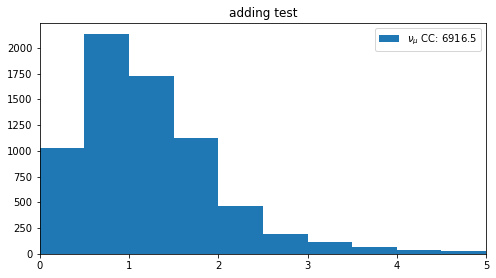

In [8]:
#Plot the truth data for numu

category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}

    
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(numu_mc_weights_tot_truth[str(c)][0])) \
            if sum(numu_mc_weights_tot_truth[str(c)][0]) else ""
            for c in numu_mc_vars_tot_truth.keys()
        ]


pup = list(numu_mc_vars_tot_truth.values())

i = 0
for c in numu_mc_vars_tot_truth.keys():
    numu_mc_vars_tot_truth[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot_truth.values())

i = 0
for c in numu_mc_weights_tot_truth.keys():
    numu_mc_weights_tot_truth[str(c)] = pup2[i][0]
    i = i + 1
        


numu_fig_truth = plt.figure(figsize=(8, 7))
numu_gs_truth = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1_truth = plt.subplot(numu_gs_truth[0])
numu_ax1_truth.set_xlim([0, 5])
#numu_ax1.set_ylim([0, 14000])

VARIABLE, BINS, RANGE, XTIT = 'nu_e',10,(0.0, 5.0),"True Energy [GeV]"

numu_stacked_truth = numu_ax1_truth.hist(
            numu_mc_vars_tot_truth.values(),
            weights=list(numu_mc_weights_tot_truth.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

#CATSEL
print(numu_stacked_truth[0])
n_numu_tot = numu_stacked_truth[0]

plt.title("adding test")
plt.legend()

In [9]:
numu_wanted_list_truth = n_numu_tot

dict_values([820, 1053, 380, 117, 39, 13, 4, 2, 5, 0])
<class 'dict_values'>


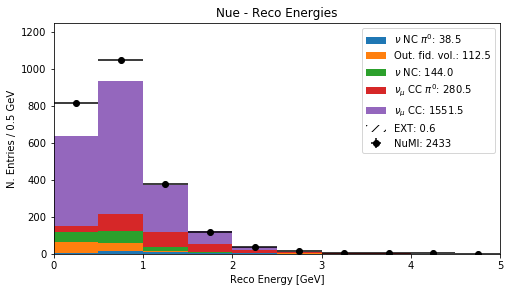

In [10]:
category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}


############################################# 
pup = list(numu_mc_vars_tot_reco.values())

i = 0
for c in numu_mc_vars_tot_reco.keys():
    numu_mc_vars_tot_reco[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot_reco.values())

i = 0
for c in numu_mc_weights_tot_reco.keys():
    numu_mc_weights_tot_reco[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot_reco.values())

i = 0
for c in numu_dirt_vars_tot_reco.keys():
    numu_dirt_vars_tot_reco[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_dirt_weights_tot_reco.values())

i = 0
for c in numu_dirt_weights_tot_reco.keys():
    numu_dirt_weights_tot_reco[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [numu_mc_vars_tot_reco, numu_dirt_vars_tot_reco]
weightss = [numu_mc_weights_tot_reco, numu_dirt_weights_tot_reco]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig_reco = plt.figure(figsize=(8, 7))
numu_gs_reco = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1_reco = plt.subplot(nue_gs_truth[0])
numu_ax1_reco.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'nu_e',10,(0.0, 5.0),"Reco Energy [GeV]"

numu_stacked_reco = numu_ax1_reco.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked_reco[0][-1])

n_ext_numu, ext_bins, patches = numu_ax1_reco.hist(
            numu_ext_vars_tot_reco[str(0)][0],
            weights=numu_ext_weights_tot_reco[str(0)][0],
            bottom=current_total_hist,
            label="EXT: %.1f" % (numu_ext_weights_tot_reco[str(0)][0]) if (numu_ext_weights_tot_reco[str(0)][0]) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

numu_ax1_reco.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

print(numu_data_vars_tot_reco[str(0)].values())
print(type(numu_data_vars_tot_reco[str(0)].values()))

numu_ax1_reco.errorbar(
            current_bincenters,
            numu_data_vars_tot_reco[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=nue_data_weights_tot_reco[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(numu_data_vars_tot_reco[str(0)].values()) if sum(numu_data_vars_tot_reco[str(0)].values()) else "")

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]

numu_ax1_reco.set_ylim([0, 1250])

plt.title("Nue - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [11]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 3

numu_wanted_list_reco = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked_reco)

[0.0, 0.0, 0.6476933933737996, 0.4327763890787537]

SUMS
[38.502059143300755, 151.0166954568138, 295.0388140587432, 575.5594870033412, 2127.0642897608413]
[112.51463631351305, 144.02211860192938, 280.52067294459806, 1551.5048027575]

Wanted List:
[489.9907571603991, 718.5202832733006, 254.59813590917292, 67.04399350464519, 15.892190431407016, 3.6195344151176414, 0.9271892951001064, 0.4799423792790094, 0.4327763890787537, 0.0]



In [12]:
def plot_eff(selected, truth, bins, bin_centers, bin_width): 

    # plot selected signal events 
    #fig, ax1 = plt.subplots(figsize=(4, 5))
    current_fig = plt.figure(figsize=(8, 7))
    gs = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(gs[0])

    # compute efficiency
    eff = [ a/b for a, b in zip(selected, truth) ]
    eff_err = []
    for i in range(len(eff)):
        eff_err.append(math.sqrt( (eff[i]*(1-eff[i]))/truth[i] ) )
        print("In bin", i, ", eff = ", eff[i], " with error = ", eff_err[i])
        
    # compute bin centers 
    bc = bin_centers
    x_err = []
    for i in range(len(selected)): 
        x_err.append(bin_width/2)

    # plot efficiency
    #ax1 = ax1.twinx()
    ax1.errorbar(bc, eff, xerr=x_err, yerr=eff_err, fmt='o', color='orangered', ecolor='orangered', markersize=3) 
    ax1.set_ylim(0, 0.6)
    ax1.set_ylabel('Efficiency', fontsize=15)
    ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
    ax1.set_title("Selection Efficiency")
    #plt.text(2, 0.45, r'MicroBooNE In Progress')
    
    print(eff)
    #np.savetxt("batch_eff_nue_fig_full_500_catsel_nopions_recoE_matrix.csv", 
    np.savetxt("batch_eff_numu_fig_full_500_catsel_nopions_recoE_matrix.csv",
           eff,
           delimiter =", ", 
           fmt ='% s')

    plt.show()
    
    #######Nue or Numu
    #current_fig.savefig("batch_eff_nue_fig_full_500_catsel_nopions_recoE.pdf")
    #current_fig.savefig("batch_eff_numu_fig_full_500_catsel_nopions_recoE.pdf")

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
In bin 0 , eff =  0.34732557021624605  with error =  0.08680465900784519
In bin 1 , eff =  0.20496289709941323  with error =  0.032782395279876524
In bin 2 , eff =  0.10034889412168412  with error =  0.028513791275161866
In bin 3 , eff =  0.06197694757999727  with error =  0.036390428973598295
In bin 4 , eff =  0.06304670091254373  with error =  0.05920082799496361
In bin 5 , eff =  0.03941488708522243  with error =  0.0676559696871165
In bin 6 , eff =  0.02835869187983018  with error =  0.0755363387699811
In bin 7 , eff =  0.03216097442647323  with error =  0.11152666842540096
In bin 8 , eff =  0.015941008628400314  with error =  0.11097951757844546
In bin 9 , eff =  0.040242617031980066  with error =  0.2777502479928664
[0.34732557021624605, 0.20496289709941323, 0.10034889412168412, 0.06197694757999727, 0.06304670091254373, 0.03941488708522243, 0.02835869187983018, 0.03216097442647323, 0

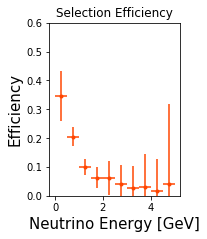

In [19]:
#Nue Selection Efficiency

bin_width = 0.5
bins = np.arange(0, 5.0, bin_width)
nue_bin_edges = np.arange(0, 5.5, bin_width)
print(nue_bin_edges)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])
print(nue_bincenters)

plot_eff(nue_wanted_list_reco, nue_wanted_list_truth, bins, nue_bincenters, bin_width)

In bin 0 , eff =  0.4750760510587767  with error =  0.01554953433220694
In bin 1 , eff =  0.3366111763807367  with error =  0.010228055845875668
In bin 2 , eff =  0.14775031337657218  with error =  0.00854838800046349
In bin 3 , eff =  0.05974603037171938  with error =  0.007075411537925857
In bin 4 , eff =  0.03389391775518658  with error =  0.008356844078634877
In bin 5 , eff =  0.01910834236787515  with error =  0.009947344968977178
In bin 6 , eff =  0.008119696272598143  with error =  0.008398180662260444
In bin 7 , eff =  0.0071000384159739995  with error =  0.010212190213186272
In bin 8 , eff =  0.010589988569390038  with error =  0.016012231563062796
In bin 9 , eff =  0.0  with error =  0.0
[0.4750760510587767, 0.3366111763807367, 0.14775031337657218, 0.05974603037171938, 0.03389391775518658, 0.01910834236787515, 0.008119696272598143, 0.0071000384159739995, 0.010589988569390038, 0.0]


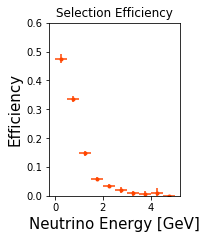

In [13]:
#Numu Selection Efficiency

bin_width = 0.5
bins = np.arange(0, 5.0, bin_width)
numu_bin_edges = np.arange(0, 5.5, bin_width)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])

plot_eff(numu_wanted_list_reco, numu_wanted_list_truth, bins, numu_bincenters, bin_width)

In [123]:
def plot_purity(selected, total_selected, bins, bin_centers, bin_width): 

    # plot selected signal events 
    #fig, ax1 = plt.subplots(figsize=(4, 5))
    current_fig = plt.figure(figsize=(8, 7))
    gs = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(gs[0])
    
    # compute efficiency
    eff = [ a/b for a, b in zip(selected, total_selected) ]
    eff_err = []
    for i in range(len(eff)):
        eff_err.append(math.sqrt( (eff[i]*(1-eff[i]))/total_selected[i] ) )
        print("In bin", i, ", eff = ", eff[i], " with error = ", eff_err[i])
        
    # compute bin centers 
    bc = bin_centers
    x_err = []
    for i in range(len(selected)): 
        x_err.append(bin_width/2)

    # plot efficiency
    #ax1 = ax1.twinx()
    ax1.errorbar(bc, eff, xerr=x_err, yerr=eff_err, fmt='o', color='orangered', ecolor='orangered', markersize=3) 
    ax1.set_ylim(0, 1.00)
    ax1.set_ylabel('Purity', fontsize=15)
    ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
    ax1.set_title("Selection Purity")
    #plt.text(2, 0.45, r'MicroBooNE In Progress')

    plt.show()
    
    #######Nue or Numu
    #current_fig.savefig("batch_pur_nue_fig_full_500_catsel_nopions_recoE.pdf")
    current_fig.savefig("batch_pur_numu_fig_full_500_catsel_nopions_recoE.pdf")

[1.51964476e+01 3.73751080e+01 1.37277557e+01 3.68510836e+00
 1.45922934e+00 4.08662548e-01 2.09075728e-01 1.19576309e-01
 2.03033201e-02 2.89523075e-02]
In bin 0 , eff =  0.6876096557846588  with error =  0.11889093603338795
In bin 1 , eff =  0.8315226380847723  with error =  0.061223279183392626
In bin 2 , eff =  0.8116893097819696  with error =  0.10551947703472381
In bin 3 , eff =  0.7383278748412527  with error =  0.22896981443241374
In bin 4 , eff =  0.728221608076505  with error =  0.36827943340621455
In bin 5 , eff =  0.7977730130716365  with error =  0.6283141016531371
In bin 6 , eff =  0.655032545299267  with error =  1.0396057968469166
In bin 7 , eff =  0.6730679754222052  with error =  1.3565494341750466
In bin 8 , eff =  1.0  with error =  0.0
In bin 9 , eff =  0.6958919291921047  with error =  2.703605252978931


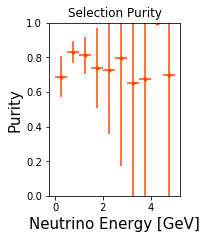

In [122]:
#Nue Selection Purity

bin_width = 0.5
bins = np.arange(0, 5.0, bin_width)
nue_bin_edges = np.arange(0, 5.5, bin_width)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])

current_total_hist = (nue_stacked_reco[0][-1])

full_total_hist_reco = current_total_hist + n_ext_nue

print(full_total_hist_reco)

plot_purity(nue_wanted_list_reco, full_total_hist_reco, bins, nue_bincenters, bin_width)

[6.40994946e+02 9.34170301e+02 3.74525916e+02 1.21734331e+02
 3.56359950e+01 1.18798829e+01 4.83432083e+00 2.18816027e+00
 1.17390443e+00 4.87741171e-01]
In bin 0 , eff =  0.7644221853362514  with error =  0.01676125499636676
In bin 1 , eff =  0.7691534215111611  with error =  0.013786536694422587
In bin 2 , eff =  0.6797877661994942  with error =  0.024108194959205864
In bin 3 , eff =  0.5507402295317961  with error =  0.045083292844042694
In bin 4 , eff =  0.44595893690706156  with error =  0.08326720138538447
In bin 5 , eff =  0.30467761796977305  with error =  0.13353874826366047
In bin 6 , eff =  0.19179308272575926  with error =  0.17906471543073635
In bin 7 , eff =  0.21933602704799932  with error =  0.2797354400840976
In bin 8 , eff =  0.36866407257009154  with error =  0.4452760014468366
In bin 9 , eff =  0.0  with error =  0.0


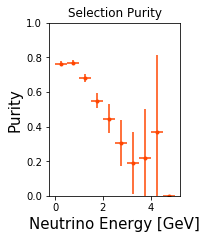

In [124]:
#Numu Selection Purity

bin_width = 0.5
bins = np.arange(0, 5.0, bin_width)
numu_bin_edges = np.arange(0, 5.5, bin_width)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])

current_total_hist = (numu_stacked_reco[0][-1])

full_total_hist_reco = current_total_hist + n_ext_numu

print(full_total_hist_reco)

plot_purity(numu_wanted_list_reco, full_total_hist_reco, bins, numu_bincenters, bin_width)

## LEPTON ANGLE

In [62]:
#Load in Angle Truth Values

nue_nue_vars_tot_df_truth = pd.read_csv("nue_nue_varstot_full_catsel_nopions_angleDiff.csv")
nue_nue_weights_tot_df_truth = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_angleDiff.csv")

nue_nue_vars_tot_truth = defaultdict(list)
nue_nue_weights_tot_truth = defaultdict(list)


nue_nue_vars_tot_truth = nue_nue_vars_tot_df_truth.to_dict()
nue_nue_weights_tot_truth = nue_nue_weights_tot_df_truth.to_dict()
nue_nue_vars_tot_truth.pop("Unnamed: 0")
nue_nue_weights_tot_truth.pop("Unnamed: 0")

poplist = []

for c in nue_nue_vars_tot_truth.keys():
    if len(nue_nue_weights_tot_truth[c][0]) > 2:
        nue_nue_weights_tot_truth[c][0] = nue_nue_weights_tot_truth[c][0][1:]
        nue_nue_weights_tot_truth[c][0] = nue_nue_weights_tot_truth[c][0][:-1]
        nue_nue_weights_tot_truth[c][0] = list(map(float,nue_nue_weights_tot_truth[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_nue_vars_tot_truth.keys():
    if len(nue_nue_vars_tot_truth[c][0]) > 2:
        nue_nue_vars_tot_truth[c][0] = nue_nue_vars_tot_truth[c][0][1:]
        nue_nue_vars_tot_truth[c][0] = nue_nue_vars_tot_truth[c][0][:-1]
        nue_nue_vars_tot_truth[c][0] = list(map(float,nue_nue_vars_tot_truth[c][0].split(",")))
        
for i in poplist:
    nue_nue_vars_tot.pop(i)
    nue_nue_weights_tot.pop(i)
    
###############################################################

###############################################################

numu_mc_vars_tot_df_truth = pd.read_csv("numu_mc_varstot_full_catsel_nopions_angleDiff.csv")
numu_mc_weights_tot_df_truth = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_angleDiff.csv")

numu_mc_vars_tot_truth = defaultdict(list)
numu_mc_weights_tot_truth = defaultdict(list)


numu_mc_vars_tot_truth = numu_mc_vars_tot_df_truth.to_dict()
numu_mc_weights_tot_truth = numu_mc_weights_tot_df_truth.to_dict()
numu_mc_vars_tot_truth.pop("Unnamed: 0")
numu_mc_weights_tot_truth.pop("Unnamed: 0")

poplist = []

for c in numu_mc_vars_tot_truth.keys():
    if len(numu_mc_weights_tot_truth[c][0]) > 2:
        numu_mc_weights_tot_truth[c][0] = numu_mc_weights_tot_truth[c][0][1:]
        numu_mc_weights_tot_truth[c][0] = numu_mc_weights_tot_truth[c][0][:-1]
        numu_mc_weights_tot_truth[c][0] = list(map(float,numu_mc_weights_tot_truth[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_mc_vars_tot_truth.keys():
    if len(numu_mc_vars_tot_truth[c][0]) > 2:
        numu_mc_vars_tot_truth[c][0] = numu_mc_vars_tot_truth[c][0][1:]
        numu_mc_vars_tot_truth[c][0] = numu_mc_vars_tot_truth[c][0][:-1]
        numu_mc_vars_tot_truth[c][0] = list(map(float,numu_mc_vars_tot_truth[c][0].split(",")))
        
for i in poplist:
    numu_mc_vars_tot_truth.pop(i)
    numu_mc_weights_tot_truth.pop(i)
    
###############################################################


In [63]:
#Load in Angle Reconstructed Values

nue_nue_vars_tot_df_reco = pd.read_csv("nue_nue_varstot_full_catsel_nopions_angleDiff_usingSelection.csv")
nue_nue_weights_tot_df_reco = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_angleDiff_usingSelection.csv")

nue_nue_vars_tot_reco = defaultdict(list)
nue_nue_weights_tot_reco = defaultdict(list)


nue_nue_vars_tot_reco = nue_nue_vars_tot_df_reco.to_dict()
nue_nue_weights_tot_reco = nue_nue_weights_tot_df_reco.to_dict()
nue_nue_vars_tot_reco.pop("Unnamed: 0")
nue_nue_weights_tot_reco.pop("Unnamed: 0")

poplist = []

for c in nue_nue_vars_tot_reco.keys():
    if len(nue_nue_weights_tot_reco[c][0]) > 2:
        nue_nue_weights_tot_reco[c][0] = nue_nue_weights_tot_reco[c][0][1:]
        nue_nue_weights_tot_reco[c][0] = nue_nue_weights_tot_reco[c][0][:-1]
        nue_nue_weights_tot_reco[c][0] = list(map(float,nue_nue_weights_tot_reco[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_nue_vars_tot_reco.keys():
    if len(nue_nue_vars_tot_reco[c][0]) > 2:
        nue_nue_vars_tot_reco[c][0] = nue_nue_vars_tot_reco[c][0][1:]
        nue_nue_vars_tot_reco[c][0] = nue_nue_vars_tot_reco[c][0][:-1]
        nue_nue_vars_tot_reco[c][0] = list(map(float,nue_nue_vars_tot_reco[c][0].split(",")))
        
for i in poplist:
    nue_nue_vars_tot_reco.pop(i)
    nue_nue_weights_tot_reco.pop(i)
    
###############################################################

nue_mc_vars_tot_df_reco = pd.read_csv("nue_mc_varstot_full_catsel_nopions_angleDiff_usingSelection.csv")
nue_mc_weights_tot_df_reco = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection.csv")

nue_mc_vars_tot_reco = defaultdict(list)
nue_mc_weights_tot_reco = defaultdict(list)


nue_mc_vars_tot_reco = nue_mc_vars_tot_df_reco.to_dict()
nue_mc_weights_tot_reco = nue_mc_weights_tot_df_reco.to_dict()
nue_mc_vars_tot_reco.pop("Unnamed: 0")
nue_mc_weights_tot_reco.pop("Unnamed: 0")

poplist = []

for c in nue_mc_vars_tot_reco.keys():
    if len(nue_mc_weights_tot_reco[c][0]) > 2:
        nue_mc_weights_tot_reco[c][0] = nue_mc_weights_tot_reco[c][0][1:]
        nue_mc_weights_tot_reco[c][0] = nue_mc_weights_tot_reco[c][0][:-1]
        nue_mc_weights_tot_reco[c][0] = list(map(float,nue_mc_weights_tot_reco[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_mc_vars_tot_reco.keys():
    if len(nue_mc_vars_tot_reco[c][0]) > 2:
        nue_mc_vars_tot_reco[c][0] = nue_mc_vars_tot_reco[c][0][1:]
        nue_mc_vars_tot_reco[c][0] = nue_mc_vars_tot_reco[c][0][:-1]
        nue_mc_vars_tot_reco[c][0] = list(map(float,nue_mc_vars_tot_reco[c][0].split(",")))
        
for i in poplist:
    nue_mc_vars_tot_reco.pop(i)
    nue_mc_weights_tot_reco.pop(i)
    
###############################################################

nue_dirt_vars_tot_df_reco = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection.csv")
nue_dirt_weights_tot_df_reco = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection.csv")

nue_dirt_vars_tot_reco = defaultdict(list)
nue_dirt_weights_tot_reco = defaultdict(list)


nue_dirt_vars_tot_reco = nue_dirt_vars_tot_df_reco.to_dict()
nue_dirt_weights_tot_reco = nue_dirt_weights_tot_df_reco.to_dict()
nue_dirt_vars_tot_reco.pop("Unnamed: 0")
nue_dirt_weights_tot_reco.pop("Unnamed: 0")

#print(nue_dirt_vars_tot[c][0])

poplist = []

for c in nue_dirt_vars_tot_reco.keys():
    if len(nue_dirt_weights_tot_reco[c][0]) > 2:
        nue_dirt_weights_tot_reco[c][0] = nue_dirt_weights_tot_reco[c][0][1:]
        nue_dirt_weights_tot_reco[c][0] = nue_dirt_weights_tot_reco[c][0][:-1]
        nue_dirt_weights_tot_reco[c][0] = list(map(float,nue_dirt_weights_tot_reco[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_dirt_vars_tot_reco.keys():
    if len(nue_dirt_vars_tot_reco[c][0]) > 2:
        nue_dirt_vars_tot_reco[c][0] = nue_dirt_vars_tot_reco[c][0][1:]
        nue_dirt_vars_tot_reco[c][0] = nue_dirt_vars_tot_reco[c][0][:-1]
        nue_dirt_vars_tot_reco[c][0] = list(map(float,nue_dirt_vars_tot_reco[c][0].split(",")))
        
for i in poplist:
    nue_dirt_vars_tot_reco.pop(i)
    nue_dirt_weights_tot_reco.pop(i)
    
print(nue_dirt_vars_tot_reco)
    
###############################################################

nue_ext_vars_tot_df_reco = pd.read_csv("nue_ext_varstot_full_catsel_nopions_angleDiff_usingSelection.csv")
nue_ext_weights_tot_df_reco = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection.csv")

nue_ext_vars_tot_reco = defaultdict(list)
nue_ext_weights_tot_reco = defaultdict(list)


nue_ext_vars_tot_reco = nue_ext_vars_tot_df_reco.to_dict()
nue_ext_weights_tot_reco = nue_ext_weights_tot_df_reco.to_dict()
nue_ext_vars_tot_reco.pop("Unnamed: 0")
nue_ext_weights_tot_reco.pop("Unnamed: 0")

#print(nue_ext_vars_tot)
"""
poplist = []

for c in nue_ext_vars_tot.keys():
    poplist.append(c)
        
for i in poplist:
    nue_ext_vars_tot.pop(i)
    nue_ext_weights_tot.pop(i)
    
print(nue_ext_vars_tot)
"""

###############################################################

nue_data_vars_tot_df_reco = pd.read_csv("nue_data_varstot_full_catsel_nopions_angleDiff_usingSelection.csv")
nue_data_weights_tot_df_reco = pd.read_csv("nue_data_weightstot_full_catsel_nopions_angleDiff_usingSelection.csv")

nue_data_vars_tot_reco = defaultdict(list)
nue_data_weights_tot_reco = defaultdict(list)


nue_data_vars_tot_reco = nue_data_vars_tot_df_reco.to_dict()
nue_data_weights_tot_reco = nue_data_weights_tot_df_reco.to_dict()
nue_data_vars_tot_reco.pop("Unnamed: 0")
nue_data_weights_tot_reco.pop("Unnamed: 0")

print(nue_data_vars_tot_reco)
"""
poplist = []

for c in nue_ext_vars_tot.keys():
    poplist.append(c)
        
for i in poplist:
    nue_ext_vars_tot.pop(i)
    nue_ext_weights_tot.pop(i)
    
print(nue_ext_vars_tot)
"""

###############################################################

numu_mc_vars_tot_df_reco = pd.read_csv("numu_mc_varstot_full_catsel_nopions_angleDiff_usingSelection.csv")
numu_mc_weights_tot_df_reco = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_angleDiff_usingSelection.csv")

numu_mc_vars_tot_reco = defaultdict(list)
numu_mc_weights_tot_reco = defaultdict(list)


numu_mc_vars_tot_reco = numu_mc_vars_tot_df_reco.to_dict()
numu_mc_weights_tot_reco = numu_mc_weights_tot_df_reco.to_dict()
numu_mc_vars_tot_reco.pop("Unnamed: 0")
numu_mc_weights_tot_reco.pop("Unnamed: 0")

poplist = []

for c in numu_mc_vars_tot_reco.keys():
    if len(numu_mc_weights_tot_reco[c][0]) > 2:
        numu_mc_weights_tot_reco[c][0] = numu_mc_weights_tot_reco[c][0][1:]
        numu_mc_weights_tot_reco[c][0] = numu_mc_weights_tot_reco[c][0][:-1]
        numu_mc_weights_tot_reco[c][0] = list(map(float,numu_mc_weights_tot_reco[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_mc_vars_tot_reco.keys():
    if len(numu_mc_vars_tot_reco[c][0]) > 2:
        numu_mc_vars_tot_reco[c][0] = numu_mc_vars_tot_reco[c][0][1:]
        numu_mc_vars_tot_reco[c][0] = numu_mc_vars_tot_reco[c][0][:-1]
        numu_mc_vars_tot_reco[c][0] = list(map(float,numu_mc_vars_tot_reco[c][0].split(",")))
        
for i in poplist:
    numu_mc_vars_tot_reco.pop(i)
    numu_mc_weights_tot_reco.pop(i)
    
###############################################################

numu_dirt_vars_tot_df_reco = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_angleDiff_usingSelection.csv")
numu_dirt_weights_tot_df_reco = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_angleDiff_usingSelection.csv")

numu_dirt_vars_tot_reco = defaultdict(list)
numu_dirt_weights_tot_reco = defaultdict(list)


numu_dirt_vars_tot_reco = numu_dirt_vars_tot_df_reco.to_dict()
numu_dirt_weights_tot_reco = numu_dirt_weights_tot_df_reco.to_dict()
numu_dirt_vars_tot_reco.pop("Unnamed: 0")
numu_dirt_weights_tot_reco.pop("Unnamed: 0")

poplist = []

for c in numu_dirt_vars_tot_reco.keys():
    if len(numu_dirt_weights_tot_reco[c][0]) > 2:
        numu_dirt_weights_tot_reco[c][0] = numu_dirt_weights_tot_reco[c][0][1:]
        numu_dirt_weights_tot_reco[c][0] = numu_dirt_weights_tot_reco[c][0][:-1]
        numu_dirt_weights_tot_reco[c][0] = list(map(float,numu_dirt_weights_tot_reco[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_dirt_vars_tot_reco.keys():
    if len(numu_dirt_vars_tot_reco[c][0]) > 2:
        numu_dirt_vars_tot_reco[c][0] = numu_dirt_vars_tot_reco[c][0][1:]
        numu_dirt_vars_tot_reco[c][0] = numu_dirt_vars_tot_reco[c][0][:-1]
        numu_dirt_vars_tot_reco[c][0] = list(map(float,numu_dirt_vars_tot_reco[c][0].split(",")))
        
for i in poplist:
    numu_dirt_vars_tot_reco.pop(i)
    numu_dirt_weights_tot_reco.pop(i) 
    
###############################################################

numu_ext_vars_tot_df_reco = pd.read_csv("numu_ext_varstot_full_catsel_nopions_angleDiff_usingSelection.csv")
numu_ext_weights_tot_df_reco = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_angleDiff_usingSelection.csv")

numu_ext_vars_tot_reco = defaultdict(list)
numu_ext_weights_tot_reco = defaultdict(list)

numu_ext_vars_tot_reco = numu_ext_vars_tot_df_reco.to_dict()
numu_ext_weights_tot_reco = numu_ext_weights_tot_df_reco.to_dict()
numu_ext_vars_tot_reco.pop("Unnamed: 0")
numu_ext_weights_tot_reco.pop("Unnamed: 0")

    
###############################################################

numu_data_vars_tot_df_reco = pd.read_csv("numu_data_varstot_full_catsel_nopions_angleDiff_usingSelection.csv")
numu_data_weights_tot_df_reco = pd.read_csv("numu_data_weightstot_full_catsel_nopions_angleDiff_usingSelection.csv")

numu_data_vars_tot_reco = defaultdict(list)
numu_data_weights_tot_reco= defaultdict(list)


numu_data_vars_tot_reco = numu_data_vars_tot_df_reco.to_dict()
numu_data_weights_tot_reco = numu_data_weights_tot_df_reco.to_dict()
numu_data_vars_tot_reco.pop("Unnamed: 0")
numu_data_weights_tot_reco.pop("Unnamed: 0")

print(numu_data_vars_tot_reco)

{'4': {0: [0.7634356446940147]}}
{'0': {0: 1, 1: 1, 2: 1, 3: 3, 4: 4, 5: 6, 6: 4, 7: 8, 8: 7, 9: 26}}
{'0': {0: 76, 1: 62, 2: 81, 3: 135, 4: 168, 5: 187, 6: 251, 7: 291, 8: 383, 9: 801}}


[  8.10445834   9.72995562  11.92840245  13.97984725  16.91281172
  22.03556155  29.15467133  40.50379144  68.73345777 149.80271888]


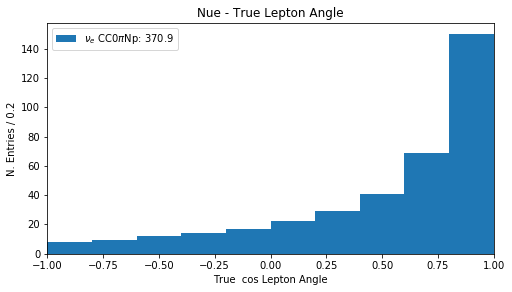

In [64]:
#Plot the truth data for nue

category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}

    
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(nue_nue_weights_tot_truth[str(c)][0])) \
            if sum(nue_nue_weights_tot_truth[str(c)][0]) else ""
            for c in nue_nue_vars_tot_truth.keys()
        ]


pup = list(nue_nue_vars_tot_truth.values())

i = 0
for c in nue_nue_vars_tot_truth.keys():
    nue_nue_vars_tot_truth[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot_truth.values())

i = 0
for c in nue_nue_weights_tot_truth.keys():
    nue_nue_weights_tot_truth[str(c)] = pup2[i][0]
    i = i + 1
        


nue_fig_truth = plt.figure(figsize=(8, 7))
nue_gs_truth = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1_truth = plt.subplot(nue_gs_truth[0])
nue_ax1_truth.set_xlim([-1, 1])

VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon',10,(-1.0, 1.0),"True Energy [GeV]"

nue_stacked_truth = nue_ax1_truth.hist(
            nue_nue_vars_tot_truth.values(),
            weights=list(nue_nue_weights_tot_truth.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

#CATSEL
print(nue_stacked_truth[0])
n_nue_tot = nue_stacked_truth[0]

plt.title("Nue - True Lepton Angle")
plt.xlabel("True  cos Lepton Angle")
plt.ylabel("N. Entries / 0.2")
plt.legend()

In [65]:
nue_wanted_list_truth = n_nue_tot

dict_values([1, 1, 1, 3, 4, 6, 4, 8, 7, 26])
<class 'dict_values'>


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


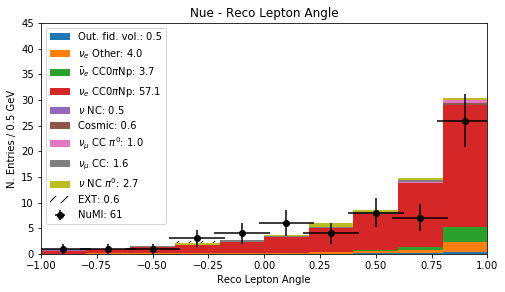

In [66]:
#Plot reco data for nue

category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}


########################################
pup = list(nue_nue_vars_tot_reco.values())

i = 0
for c in nue_nue_vars_tot_reco.keys():
    nue_nue_vars_tot_reco[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot_reco.values())

i = 0
for c in nue_nue_weights_tot_reco.keys():
    nue_nue_weights_tot_reco[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot_reco.values())

i = 0
for c in nue_mc_vars_tot_reco.keys():
    nue_mc_vars_tot_reco[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot_reco.values())

i = 0
for c in nue_mc_weights_tot_reco.keys():
    nue_mc_weights_tot_reco[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot_reco.values())

i = 0
for c in nue_dirt_vars_tot_reco.keys():
    nue_dirt_vars_tot_reco[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot_reco.values())

i = 0
for c in nue_dirt_weights_tot_reco.keys():
    nue_dirt_weights_tot_reco[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_vars_tot_reco, nue_mc_vars_tot_reco, nue_dirt_vars_tot_reco]
weightss = [nue_nue_weights_tot_reco, nue_mc_weights_tot_reco, nue_dirt_weights_tot_reco]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_fig_reco = plt.figure(figsize=(8, 7))
nue_gs_reco = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1_reco = plt.subplot(nue_gs_truth[0])
nue_ax1_reco.set_xlim([-1, 1])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon',10,(-1.0, 1.0),"Reco Energy [GeV]"

nue_stacked_reco = nue_ax1_reco.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked_reco[0][-1])

n_ext_nue, ext_bins, patches = nue_ax1_reco.hist(
            nue_ext_vars_tot_reco[str(0)][0],
            weights=nue_ext_weights_tot_reco[str(0)][0],
            bottom=current_total_hist,
            label="EXT: %.1f" % (nue_ext_weights_tot_reco[str(0)][0]) if (nue_ext_weights_tot_reco[str(0)][0]) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)


nue_ax1_reco.set_xlim([-1, 1])    #AngleDiff
current_bincenters =  np.arange(-0.9, 1.1, 0.2)
current_bin_size = 0.25

print(nue_data_vars_tot_reco[str(0)].values())
print(type(nue_data_vars_tot_reco[str(0)].values()))

nue_ax1_reco.errorbar(
            current_bincenters,
            nue_data_vars_tot_reco[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=nue_data_weights_tot_reco[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(nue_data_vars_tot_reco[str(0)].values()) if sum(nue_data_vars_tot_reco[str(0)].values()) else "")

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]

nue_ax1_reco.set_ylim([0, 45])

plt.title("Nue - Reco Lepton Angle")
plt.xlabel("Reco Lepton Angle")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [67]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 2

nue_wanted_list_reco = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked_reco)

[0.6620346769819698, 0.5855312745174572, 12.39217281696287, 0.0, 0.10281934893190225, 0.20166932021234985, 0.4572930122204255, 0.22950515768621216]

SUMS
[0.5189284452867611, 4.542784267443612, 8.28884041474403, 65.34301481986299, 65.81595131921506, 66.37839252474622, 67.34787533936593, 68.996723457138, 71.68567389001947]
[4.023855822156851, 3.7460561473004175, 57.05417440511896, 0.47293649935207327, 0.5624412055311581, 0.9694828146197096, 1.6488481177720757, 2.6889504328814695]

Wanted List:
[0.5245597616571964, 0.7888348181634186, 1.1999946333569504, 1.5090921368400503, 2.062205296442193, 3.1281474241078753, 4.601737730421826, 7.065934604508998, 12.39217281696287, 23.78149518265758]



[ 182.62629881  193.39827184  228.56132802  269.90394813  308.08708208
  389.16178138  500.43414798  681.29308949 1131.61534943 3031.39156109]


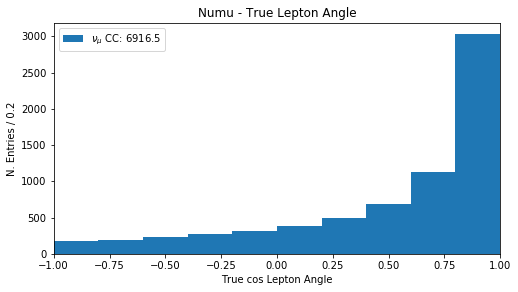

In [68]:
#Plot the truth data for numu

category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}

    
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(numu_mc_weights_tot_truth[str(c)][0])) \
            if sum(numu_mc_weights_tot_truth[str(c)][0]) else ""
            for c in numu_mc_vars_tot_truth.keys()
        ]


pup = list(numu_mc_vars_tot_truth.values())

i = 0
for c in numu_mc_vars_tot_truth.keys():
    numu_mc_vars_tot_truth[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot_truth.values())

i = 0
for c in numu_mc_weights_tot_truth.keys():
    numu_mc_weights_tot_truth[str(c)] = pup2[i][0]
    i = i + 1
        


numu_fig_truth = plt.figure(figsize=(8, 7))
numu_gs_truth = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1_truth = plt.subplot(numu_gs_truth[0])
numu_ax1_truth.set_xlim([-1, 1])
#numu_ax1.set_ylim([0, 14000])

VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon',10,(-1.0, 1.0),"True Energy [GeV]"

numu_stacked_truth = numu_ax1_truth.hist(
            numu_mc_vars_tot_truth.values(),
            weights=list(numu_mc_weights_tot_truth.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

#CATSEL
print(numu_stacked_truth[0])
n_numu_tot = numu_stacked_truth[0]

plt.title("Numu - True Lepton Angle")
plt.xlabel("True cos Lepton Angle")
plt.ylabel("N. Entries / 0.2")
plt.legend()

In [69]:
numu_wanted_list_truth = n_numu_tot

dict_values([76, 62, 81, 135, 168, 187, 251, 291, 383, 801])
<class 'dict_values'>


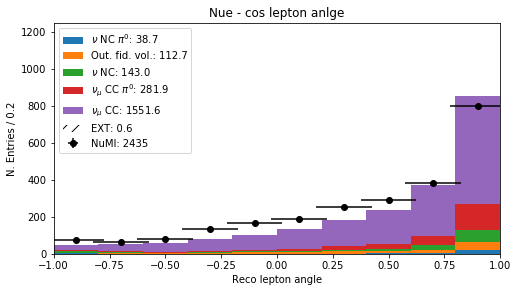

In [70]:
category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}


############################################# 
pup = list(numu_mc_vars_tot_reco.values())

i = 0
for c in numu_mc_vars_tot_reco.keys():
    numu_mc_vars_tot_reco[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot_reco.values())

i = 0
for c in numu_mc_weights_tot_reco.keys():
    numu_mc_weights_tot_reco[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot_reco.values())

i = 0
for c in numu_dirt_vars_tot_reco.keys():
    numu_dirt_vars_tot_reco[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_dirt_weights_tot_reco.values())

i = 0
for c in numu_dirt_weights_tot_reco.keys():
    numu_dirt_weights_tot_reco[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [numu_mc_vars_tot_reco, numu_dirt_vars_tot_reco]
weightss = [numu_mc_weights_tot_reco, numu_dirt_weights_tot_reco]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig_reco = plt.figure(figsize=(8, 7))
numu_gs_reco = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1_reco = plt.subplot(nue_gs_truth[0])
numu_ax1_reco.set_xlim([-1, 1])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'cosNu_Angle_Numi_Muon',10,(-1.0, 1.0),"cos Lepton Angle"

numu_stacked_reco = numu_ax1_reco.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked_reco[0][-1])

n_ext_numu, ext_bins, patches = numu_ax1_reco.hist(
            numu_ext_vars_tot_reco[str(0)][0],
            weights=numu_ext_weights_tot_reco[str(0)][0],
            bottom=current_total_hist,
            label="EXT: %.1f" % (numu_ext_weights_tot_reco[str(0)][0]) if (numu_ext_weights_tot_reco[str(0)][0]) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)


nue_ax1_reco.set_xlim([-1, 1])    #AngleDiff
current_bincenters =  np.arange(-0.9, 1.1, 0.2)
current_bin_size = 0.25

print(numu_data_vars_tot_reco[str(0)].values())
print(type(numu_data_vars_tot_reco[str(0)].values()))

numu_ax1_reco.errorbar(
            current_bincenters,
            numu_data_vars_tot_reco[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=nue_data_weights_tot_reco[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(numu_data_vars_tot_reco[str(0)].values()) if sum(numu_data_vars_tot_reco[str(0)].values()) else "")

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]

numu_ax1_reco.set_ylim([0, 1250])

plt.title("Nue - cos lepton anlge")
plt.xlabel("Reco lepton angle")
plt.ylabel("N. Entries / 0.2")
plt.legend()

In [71]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 3

numu_wanted_list_reco = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked_reco)

[15.2091791743495, 23.808493146521457, 52.58612181993235, 277.01247397806776]

SUMS
[38.71722912326027, 151.37882700034484, 294.37273364477824, 576.2726205017808, 2127.863717459555]
[112.66159787708457, 142.9939066444334, 281.89988685700257, 1551.5910969577744]

Wanted List:
[31.172518312314853, 41.72202604654176, 47.001365612618685, 63.73950058997193, 78.36879739259305, 108.70017068518092, 138.63883113773255, 179.8249736798345, 277.01247397806776, 585.4104395229184]



In [80]:
def plot_eff(selected, truth, bins, bin_centers, bin_width): 

    # plot selected signal events 
    #fig, ax1 = plt.subplots(figsize=(4, 5))
    current_fig = plt.figure(figsize=(8, 7))
    gs = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(gs[0])

    # compute efficiency
    eff = [ a/b for a, b in zip(selected, truth) ]
    eff_err = []
    for i in range(len(eff)):
        eff_err.append(math.sqrt( (eff[i]*(1-eff[i]))/truth[i] ) )
        print("In bin", i, ", eff = ", eff[i], " with error = ", eff_err[i])
        
    # compute bin centers 
    bc = bin_centers
    x_err = []
    for i in range(len(selected)): 
        x_err.append(bin_width/2)

    # plot efficiency
    #ax1 = ax1.twinx()
    print(bc)
    ax1.errorbar(bc, eff, xerr=x_err, yerr=eff_err, fmt='o', color='orangered', ecolor='orangered', markersize=3) 
    ax1.set_ylim(0, 0.4)
    ax1.set_ylabel('Efficiency', fontsize=15)
    ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
    ax1.set_title("Selection Efficiency")
    #plt.text(-0.2, 0.35, r'MicroBooNE In Progress')

    plt.show()
    
    #######Nue or Numu
    #current_fig.savefig("batch_eff_nue_fig_full_500_catsel_nopions_angleDiff.pdf")
    current_fig.savefig("batch_eff_numu_fig_full_500_catsel_nopions_angleDiff.pdf")

[-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
 -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
  6.00000000e-01  8.00000000e-01  1.00000000e+00]
[-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
In bin 0 , eff =  0.06472483906715779  with error =  0.08642575712989894
In bin 1 , eff =  0.08107280737629582  with error =  0.08750295666693138
In bin 2 , eff =  0.10059977754593886  with error =  0.08709312299367006
In bin 3 , eff =  0.10794768423398365  with error =  0.08299474872112787
In bin 4 , eff =  0.1219315469249294  with error =  0.0795635810341689
In bin 5 , eff =  0.1419590518015412  with error =  0.07434871909165346
In bin 6 , eff =  0.1578387791742908  with error =  0.0675227935152408
In bin 7 , eff =  0.17445118972037985  with error =  0.0596294092320858
In bin 8 , eff =  0.18029316754082003  with error =  0.04636975654356829
In bin 9 , eff =  0.15875209316013342  with error =  0.029858080221475656
[-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0

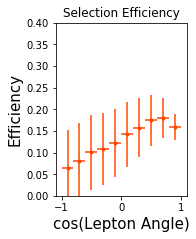

In [79]:
#Nue Selection Efficiency

bin_width = 0.2
bins = np.arange(-1, 1, bin_width)
nue_bin_edges = np.arange(-1, 1.2, bin_width)
print(nue_bin_edges)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])
print(nue_bincenters)

plot_eff(nue_wanted_list_reco, nue_wanted_list_truth, bins, nue_bincenters, bin_width)

In bin 0 , eff =  0.1706901936685395  with error =  0.027840756196972263
In bin 1 , eff =  0.21573112132172126  with error =  0.02957757721230396
In bin 2 , eff =  0.20564006177090988  with error =  0.026733828280313864
In bin 3 , eff =  0.23615623643399206  with error =  0.025852191205013798
In bin 4 , eff =  0.25437222769318435  with error =  0.024811849606394452
In bin 5 , eff =  0.2793187200953357  with error =  0.022743460816312882
In bin 6 , eff =  0.2770371120717125  with error =  0.020005688821435105
In bin 7 , eff =  0.2639465693301914  with error =  0.016886735053211865
In bin 8 , eff =  0.24479384635219456  with error =  0.012781552061937027
In bin 9 , eff =  0.19311607482107643  with error =  0.007169580178807893
[-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]


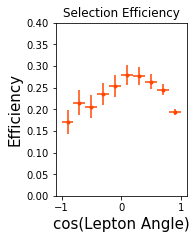

In [81]:
#Numu Selection Efficiency

bin_width = 0.2
bins = np.arange(-1, 1, bin_width)
numu_bin_edges = np.arange(-1, 1.2, bin_width)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])

plot_eff(numu_wanted_list_reco, numu_wanted_list_truth, bins, numu_bincenters, bin_width)

In [86]:
def plot_purity(selected, total_selected, bins, bin_centers, bin_width): 

    # plot selected signal events 
    #fig, ax1 = plt.subplots(figsize=(4, 5))
    current_fig = plt.figure(figsize=(8, 7))
    gs = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(gs[0])

    # compute efficiency
    eff = [ a/b for a, b in zip(selected, total_selected) ]
    eff_err = []
    for i in range(len(eff)):
        eff_err.append(math.sqrt( (eff[i]*(1-eff[i]))/total_selected[i] ) )
        print("In bin", i, ", eff = ", eff[i], " with error = ", eff_err[i])
        
    # compute bin centers 
    bc = bin_centers
    x_err = []
    for i in range(len(selected)): 
        x_err.append(bin_width/2)

    # plot efficiency
    #ax1 = ax1.twinx()
    ax1.errorbar(bc, eff, xerr=x_err, yerr=eff_err, fmt='o', color='orangered', ecolor='orangered', markersize=3) 
    ax1.set_ylim(0, 1.00)
    ax1.set_ylabel('Purity', fontsize=15)
    ax1.set_xlabel('cos(Lepton Angle)', fontsize=15)
    ax1.set_title("Selection Purity")
    #plt.text(-0.2, 0.25, r'MicroBooNE In Progress')
    #plt.text(-0.4, -0.1, r'cos(Lepton Angle)')

    plt.show()
    
    #######Nue or Numu
    #current_fig.savefig("batch_pur_nue_fig_full_500_catsel_nopions_angleDiff.pdf")
    current_fig.savefig("batch_pur_numu_fig_full_500_catsel_nopions_angleDiff.pdf")

[ 0.97367207  0.91911881  1.57812621  2.59239928  2.7213923   3.60715573
  6.1039101   8.5518225  14.71997856 30.4793071 ]
In bin 0 , eff =  0.5387437694611482  with error =  0.5051913393693952
In bin 1 , eff =  0.8582511952862469  with error =  0.36381540455290196
In bin 2 , eff =  0.7603920580443494  with error =  0.3397805576435898
In bin 3 , eff =  0.5821218004711878  with error =  0.30632387220249957
In bin 4 , eff =  0.7577758257194576  with error =  0.2597069306470582
In bin 5 , eff =  0.8672060932678679  with error =  0.17867664469070887
In bin 6 , eff =  0.7538999851553115  with error =  0.17434464927220955
In bin 7 , eff =  0.8262489783688802  with error =  0.12956563029361956
In bin 8 , eff =  0.8418607927249294  with error =  0.0951012733695408
In bin 9 , eff =  0.780250518912254  with error =  0.0750029624320588


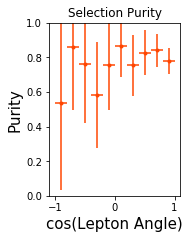

In [85]:
#Nue Selection Purity

bin_width = 0.2
bins = np.arange(-1, 1, bin_width)
nue_bin_edges = np.arange(-1, 1.2, bin_width)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])

current_total_hist = (nue_stacked_reco[0][-1])

full_total_hist_reco = current_total_hist + n_ext_nue

print(full_total_hist_reco)

plot_purity(nue_wanted_list_reco, full_total_hist_reco, bins, nue_bincenters, bin_width)

[ 49.43994747  55.05365098  58.42989125  80.49915416 100.4924857
 136.56332283 183.32962393 235.53599138 374.59485309 854.48600544]
In bin 0 , eff =  0.6305127717447335  with error =  0.06864480241593506
In bin 1 , eff =  0.7578430368420841  with error =  0.057735781733683864
In bin 2 , eff =  0.8044061798942106  with error =  0.05189167921087243
In bin 3 , eff =  0.791803358172024  with error =  0.04525326004240875
In bin 4 , eff =  0.7798473373381977  with error =  0.041333289864584004
In bin 5 , eff =  0.7959689939446652  with error =  0.03448491208330351
In bin 6 , eff =  0.7562271070155175  with error =  0.03171045709041629
In bin 7 , eff =  0.7634713175963257  with error =  0.02768915035110609
In bin 8 , eff =  0.7394988791131545  with error =  0.022677368394443856
In bin 9 , eff =  0.6851024309312286  with error =  0.015889489014737256


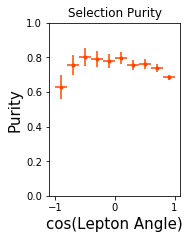

In [87]:
#Numu Selection Purity

bin_width = 0.2
bins = np.arange(-1, 1, bin_width)
numu_bin_edges = np.arange(-1, 1.2, bin_width)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])

current_total_hist = (numu_stacked_reco[0][-1])

full_total_hist_reco = current_total_hist + n_ext_numu

print(full_total_hist_reco)

plot_purity(numu_wanted_list_reco, full_total_hist_reco, bins, numu_bincenters, bin_width)

## LEPTON MOMENTUM

In [88]:
#Load in Neutrino Energy Truth Values

nue_nue_vars_tot_df_truth = pd.read_csv("nue_nue_varstot_full_catsel_nopions_leptonMom.csv")
nue_nue_weights_tot_df_truth = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_leptonMom.csv")

nue_nue_vars_tot_truth = defaultdict(list)
nue_nue_weights_tot_truth = defaultdict(list)


nue_nue_vars_tot_truth = nue_nue_vars_tot_df_truth.to_dict()
nue_nue_weights_tot_truth = nue_nue_weights_tot_df_truth.to_dict()
nue_nue_vars_tot_truth.pop("Unnamed: 0")
nue_nue_weights_tot_truth.pop("Unnamed: 0")

poplist = []

for c in nue_nue_vars_tot_truth.keys():
    if len(nue_nue_weights_tot_truth[c][0]) > 2:
        nue_nue_weights_tot_truth[c][0] = nue_nue_weights_tot_truth[c][0][1:]
        nue_nue_weights_tot_truth[c][0] = nue_nue_weights_tot_truth[c][0][:-1]
        nue_nue_weights_tot_truth[c][0] = list(map(float,nue_nue_weights_tot_truth[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_nue_vars_tot_truth.keys():
    if len(nue_nue_vars_tot_truth[c][0]) > 2:
        nue_nue_vars_tot_truth[c][0] = nue_nue_vars_tot_truth[c][0][1:]
        nue_nue_vars_tot_truth[c][0] = nue_nue_vars_tot_truth[c][0][:-1]
        nue_nue_vars_tot_truth[c][0] = list(map(float,nue_nue_vars_tot_truth[c][0].split(",")))
        
for i in poplist:
    nue_nue_vars_tot.pop(i)
    nue_nue_weights_tot.pop(i)
    
###############################################################

###############################################################

numu_mc_vars_tot_df_truth = pd.read_csv("numu_mc_varstot_full_catsel_nopions_leptonMom.csv")
numu_mc_weights_tot_df_truth = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_leptonMom.csv")

numu_mc_vars_tot_truth = defaultdict(list)
numu_mc_weights_tot_truth = defaultdict(list)


numu_mc_vars_tot_truth = numu_mc_vars_tot_df_truth.to_dict()
numu_mc_weights_tot_truth = numu_mc_weights_tot_df_truth.to_dict()
numu_mc_vars_tot_truth.pop("Unnamed: 0")
numu_mc_weights_tot_truth.pop("Unnamed: 0")

poplist = []

for c in numu_mc_vars_tot_truth.keys():
    if len(numu_mc_weights_tot_truth[c][0]) > 2:
        numu_mc_weights_tot_truth[c][0] = numu_mc_weights_tot_truth[c][0][1:]
        numu_mc_weights_tot_truth[c][0] = numu_mc_weights_tot_truth[c][0][:-1]
        numu_mc_weights_tot_truth[c][0] = list(map(float,numu_mc_weights_tot_truth[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_mc_vars_tot_truth.keys():
    if len(numu_mc_vars_tot_truth[c][0]) > 2:
        numu_mc_vars_tot_truth[c][0] = numu_mc_vars_tot_truth[c][0][1:]
        numu_mc_vars_tot_truth[c][0] = numu_mc_vars_tot_truth[c][0][:-1]
        numu_mc_vars_tot_truth[c][0] = list(map(float,numu_mc_vars_tot_truth[c][0].split(",")))
        
for i in poplist:
    numu_mc_vars_tot_truth.pop(i)
    numu_mc_weights_tot_truth.pop(i)
    
###############################################################


In [89]:
#Load in Neutrino Energy Reconstructed Values

nue_nue_vars_tot_df_reco = pd.read_csv("nue_nue_varstot_full_catsel_nopions_leptonMom_usingSelection.csv")
nue_nue_weights_tot_df_reco = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_leptonMom_usingSelection.csv")

nue_nue_vars_tot_reco = defaultdict(list)
nue_nue_weights_tot_reco = defaultdict(list)


nue_nue_vars_tot_reco = nue_nue_vars_tot_df_reco.to_dict()
nue_nue_weights_tot_reco = nue_nue_weights_tot_df_reco.to_dict()
nue_nue_vars_tot_reco.pop("Unnamed: 0")
nue_nue_weights_tot_reco.pop("Unnamed: 0")

poplist = []

for c in nue_nue_vars_tot_reco.keys():
    if len(nue_nue_weights_tot_reco[c][0]) > 2:
        nue_nue_weights_tot_reco[c][0] = nue_nue_weights_tot_reco[c][0][1:]
        nue_nue_weights_tot_reco[c][0] = nue_nue_weights_tot_reco[c][0][:-1]
        nue_nue_weights_tot_reco[c][0] = list(map(float,nue_nue_weights_tot_reco[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_nue_vars_tot_reco.keys():
    if len(nue_nue_vars_tot_reco[c][0]) > 2:
        nue_nue_vars_tot_reco[c][0] = nue_nue_vars_tot_reco[c][0][1:]
        nue_nue_vars_tot_reco[c][0] = nue_nue_vars_tot_reco[c][0][:-1]
        nue_nue_vars_tot_reco[c][0] = list(map(float,nue_nue_vars_tot_reco[c][0].split(",")))
        
for i in poplist:
    nue_nue_vars_tot_reco.pop(i)
    nue_nue_weights_tot_reco.pop(i)
    
###############################################################

nue_mc_vars_tot_df_reco = pd.read_csv("nue_mc_varstot_full_catsel_nopions_leptonMom_usingSelection.csv")
nue_mc_weights_tot_df_reco = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection.csv")

nue_mc_vars_tot_reco = defaultdict(list)
nue_mc_weights_tot_reco = defaultdict(list)


nue_mc_vars_tot_reco = nue_mc_vars_tot_df_reco.to_dict()
nue_mc_weights_tot_reco = nue_mc_weights_tot_df_reco.to_dict()
nue_mc_vars_tot_reco.pop("Unnamed: 0")
nue_mc_weights_tot_reco.pop("Unnamed: 0")

poplist = []

for c in nue_mc_vars_tot_reco.keys():
    if len(nue_mc_weights_tot_reco[c][0]) > 2:
        nue_mc_weights_tot_reco[c][0] = nue_mc_weights_tot_reco[c][0][1:]
        nue_mc_weights_tot_reco[c][0] = nue_mc_weights_tot_reco[c][0][:-1]
        nue_mc_weights_tot_reco[c][0] = list(map(float,nue_mc_weights_tot_reco[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_mc_vars_tot_reco.keys():
    if len(nue_mc_vars_tot_reco[c][0]) > 2:
        nue_mc_vars_tot_reco[c][0] = nue_mc_vars_tot_reco[c][0][1:]
        nue_mc_vars_tot_reco[c][0] = nue_mc_vars_tot_reco[c][0][:-1]
        nue_mc_vars_tot_reco[c][0] = list(map(float,nue_mc_vars_tot_reco[c][0].split(",")))
        
for i in poplist:
    nue_mc_vars_tot_reco.pop(i)
    nue_mc_weights_tot_reco.pop(i)
    
###############################################################

nue_dirt_vars_tot_df_reco = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection.csv")
nue_dirt_weights_tot_df_reco = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection.csv")

nue_dirt_vars_tot_reco = defaultdict(list)
nue_dirt_weights_tot_reco = defaultdict(list)


nue_dirt_vars_tot_reco = nue_dirt_vars_tot_df_reco.to_dict()
nue_dirt_weights_tot_reco = nue_dirt_weights_tot_df_reco.to_dict()
nue_dirt_vars_tot_reco.pop("Unnamed: 0")
nue_dirt_weights_tot_reco.pop("Unnamed: 0")

#print(nue_dirt_vars_tot[c][0])

poplist = []

for c in nue_dirt_vars_tot_reco.keys():
    if len(nue_dirt_weights_tot_reco[c][0]) > 2:
        nue_dirt_weights_tot_reco[c][0] = nue_dirt_weights_tot_reco[c][0][1:]
        nue_dirt_weights_tot_reco[c][0] = nue_dirt_weights_tot_reco[c][0][:-1]
        nue_dirt_weights_tot_reco[c][0] = list(map(float,nue_dirt_weights_tot_reco[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_dirt_vars_tot_reco.keys():
    if len(nue_dirt_vars_tot_reco[c][0]) > 2:
        nue_dirt_vars_tot_reco[c][0] = nue_dirt_vars_tot_reco[c][0][1:]
        nue_dirt_vars_tot_reco[c][0] = nue_dirt_vars_tot_reco[c][0][:-1]
        nue_dirt_vars_tot_reco[c][0] = list(map(float,nue_dirt_vars_tot_reco[c][0].split(",")))
        
for i in poplist:
    nue_dirt_vars_tot_reco.pop(i)
    nue_dirt_weights_tot_reco.pop(i)
    
print(nue_dirt_vars_tot_reco)
    
###############################################################

nue_ext_vars_tot_df_reco = pd.read_csv("nue_ext_varstot_full_catsel_nopions_leptonMom_usingSelection.csv")
nue_ext_weights_tot_df_reco = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection.csv")

nue_ext_vars_tot_reco = defaultdict(list)
nue_ext_weights_tot_reco = defaultdict(list)


nue_ext_vars_tot_reco = nue_ext_vars_tot_df_reco.to_dict()
nue_ext_weights_tot_reco = nue_ext_weights_tot_df_reco.to_dict()
nue_ext_vars_tot_reco.pop("Unnamed: 0")
nue_ext_weights_tot_reco.pop("Unnamed: 0")

#print(nue_ext_vars_tot)
"""
poplist = []

for c in nue_ext_vars_tot.keys():
    poplist.append(c)
        
for i in poplist:
    nue_ext_vars_tot.pop(i)
    nue_ext_weights_tot.pop(i)
    
print(nue_ext_vars_tot)
"""

###############################################################

nue_data_vars_tot_df_reco = pd.read_csv("nue_data_varstot_full_catsel_nopions_leptonMom_usingSelection.csv")
nue_data_weights_tot_df_reco = pd.read_csv("nue_data_weightstot_full_catsel_nopions_leptonMom_usingSelection.csv")

nue_data_vars_tot_reco = defaultdict(list)
nue_data_weights_tot_reco = defaultdict(list)


nue_data_vars_tot_reco = nue_data_vars_tot_df_reco.to_dict()
nue_data_weights_tot_reco = nue_data_weights_tot_df_reco.to_dict()
nue_data_vars_tot_reco.pop("Unnamed: 0")
nue_data_weights_tot_reco.pop("Unnamed: 0")

print(nue_data_vars_tot_reco)
"""
poplist = []

for c in nue_ext_vars_tot.keys():
    poplist.append(c)
        
for i in poplist:
    nue_ext_vars_tot.pop(i)
    nue_ext_weights_tot.pop(i)
    
print(nue_ext_vars_tot)
"""

###############################################################

numu_mc_vars_tot_df_reco = pd.read_csv("numu_mc_varstot_full_catsel_nopions_leptonMom_usingSelection.csv")
numu_mc_weights_tot_df_reco = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_leptonMom_usingSelection.csv")

numu_mc_vars_tot_reco = defaultdict(list)
numu_mc_weights_tot_reco = defaultdict(list)


numu_mc_vars_tot_reco = numu_mc_vars_tot_df_reco.to_dict()
numu_mc_weights_tot_reco = numu_mc_weights_tot_df_reco.to_dict()
numu_mc_vars_tot_reco.pop("Unnamed: 0")
numu_mc_weights_tot_reco.pop("Unnamed: 0")

poplist = []

for c in numu_mc_vars_tot_reco.keys():
    if len(numu_mc_weights_tot_reco[c][0]) > 2:
        numu_mc_weights_tot_reco[c][0] = numu_mc_weights_tot_reco[c][0][1:]
        numu_mc_weights_tot_reco[c][0] = numu_mc_weights_tot_reco[c][0][:-1]
        numu_mc_weights_tot_reco[c][0] = list(map(float,numu_mc_weights_tot_reco[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_mc_vars_tot_reco.keys():
    if len(numu_mc_vars_tot_reco[c][0]) > 2:
        numu_mc_vars_tot_reco[c][0] = numu_mc_vars_tot_reco[c][0][1:]
        numu_mc_vars_tot_reco[c][0] = numu_mc_vars_tot_reco[c][0][:-1]
        numu_mc_vars_tot_reco[c][0] = list(map(float,numu_mc_vars_tot_reco[c][0].split(",")))
        
for i in poplist:
    numu_mc_vars_tot_reco.pop(i)
    numu_mc_weights_tot_reco.pop(i)
    
###############################################################

numu_dirt_vars_tot_df_reco = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_leptonMom_usingSelection.csv")
numu_dirt_weights_tot_df_reco = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_leptonMom_usingSelection.csv")

numu_dirt_vars_tot_reco = defaultdict(list)
numu_dirt_weights_tot_reco = defaultdict(list)


numu_dirt_vars_tot_reco = numu_dirt_vars_tot_df_reco.to_dict()
numu_dirt_weights_tot_reco = numu_dirt_weights_tot_df_reco.to_dict()
numu_dirt_vars_tot_reco.pop("Unnamed: 0")
numu_dirt_weights_tot_reco.pop("Unnamed: 0")

poplist = []

for c in numu_dirt_vars_tot_reco.keys():
    if len(numu_dirt_weights_tot_reco[c][0]) > 2:
        numu_dirt_weights_tot_reco[c][0] = numu_dirt_weights_tot_reco[c][0][1:]
        numu_dirt_weights_tot_reco[c][0] = numu_dirt_weights_tot_reco[c][0][:-1]
        numu_dirt_weights_tot_reco[c][0] = list(map(float,numu_dirt_weights_tot_reco[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in numu_dirt_vars_tot_reco.keys():
    if len(numu_dirt_vars_tot_reco[c][0]) > 2:
        numu_dirt_vars_tot_reco[c][0] = numu_dirt_vars_tot_reco[c][0][1:]
        numu_dirt_vars_tot_reco[c][0] = numu_dirt_vars_tot_reco[c][0][:-1]
        numu_dirt_vars_tot_reco[c][0] = list(map(float,numu_dirt_vars_tot_reco[c][0].split(",")))
        
for i in poplist:
    numu_dirt_vars_tot_reco.pop(i)
    numu_dirt_weights_tot_reco.pop(i) 
    
###############################################################

numu_ext_vars_tot_df_reco = pd.read_csv("numu_ext_varstot_full_catsel_nopions_leptonMom_usingSelection.csv")
numu_ext_weights_tot_df_reco = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_leptonMom_usingSelection.csv")

numu_ext_vars_tot_reco = defaultdict(list)
numu_ext_weights_tot_reco = defaultdict(list)

numu_ext_vars_tot_reco = numu_ext_vars_tot_df_reco.to_dict()
numu_ext_weights_tot_reco = numu_ext_weights_tot_df_reco.to_dict()
numu_ext_vars_tot_reco.pop("Unnamed: 0")
numu_ext_weights_tot_reco.pop("Unnamed: 0")

    
###############################################################

numu_data_vars_tot_df_reco = pd.read_csv("numu_data_varstot_full_catsel_nopions_leptonMom_usingSelection.csv")
numu_data_weights_tot_df_reco = pd.read_csv("numu_data_weightstot_full_catsel_nopions_leptonMom_usingSelection.csv")

numu_data_vars_tot_reco = defaultdict(list)
numu_data_weights_tot_reco= defaultdict(list)


numu_data_vars_tot_reco = numu_data_vars_tot_df_reco.to_dict()
numu_data_weights_tot_reco = numu_data_weights_tot_df_reco.to_dict()
numu_data_vars_tot_reco.pop("Unnamed: 0")
numu_data_weights_tot_reco.pop("Unnamed: 0")

print(numu_data_vars_tot_reco)

{'4': {0: [0.102248594]}}
{'0': {0: 39, 1: 14, 2: 6, 3: 1, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}}
{'0': {0: 1745, 1: 571, 2: 99, 3: 17, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}}


[1.43146002e+02 1.39450110e+02 5.22520794e+01 1.91941412e+01
 8.09536565e+00 4.77099789e+00 2.33257213e+00 1.19757401e+00
 3.67282483e-01 7.95518001e-02]


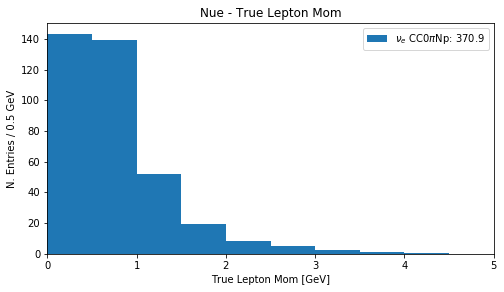

In [90]:
#Plot the truth data for nue

category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}

    
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(nue_nue_weights_tot_truth[str(c)][0])) \
            if sum(nue_nue_weights_tot_truth[str(c)][0]) else ""
            for c in nue_nue_vars_tot_truth.keys()
        ]


pup = list(nue_nue_vars_tot_truth.values())

i = 0
for c in nue_nue_vars_tot_truth.keys():
    nue_nue_vars_tot_truth[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot_truth.values())

i = 0
for c in nue_nue_weights_tot_truth.keys():
    nue_nue_weights_tot_truth[str(c)] = pup2[i][0]
    i = i + 1
        


nue_fig_truth = plt.figure(figsize=(8, 7))
nue_gs_truth = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1_truth = plt.subplot(nue_gs_truth[0])
nue_ax1_truth.set_xlim([0, 5])

VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon',10,(0.0, 5.0),"True Lepton Mom [GeV]"

nue_stacked_truth = nue_ax1_truth.hist(
            nue_nue_vars_tot_truth.values(),
            weights=list(nue_nue_weights_tot_truth.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

#CATSEL
print(nue_stacked_truth[0])
n_nue_tot = nue_stacked_truth[0]

plt.title("Nue - True Lepton Mom")
plt.xlabel("True Lepton Mom [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [91]:
nue_wanted_list_truth = n_nue_tot

dict_values([39, 14, 6, 1, 0, 1, 0, 0, 0, 0])
<class 'dict_values'>


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


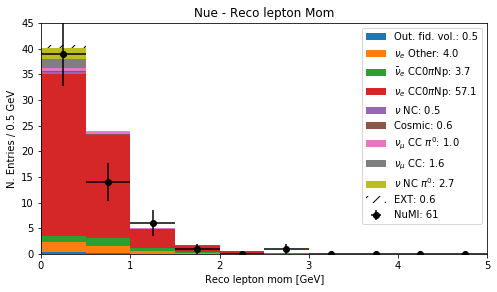

In [92]:
#Plot reco data for nue

category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}


########################################
pup = list(nue_nue_vars_tot_reco.values())

i = 0
for c in nue_nue_vars_tot_reco.keys():
    nue_nue_vars_tot_reco[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot_reco.values())

i = 0
for c in nue_nue_weights_tot_reco.keys():
    nue_nue_weights_tot_reco[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot_reco.values())

i = 0
for c in nue_mc_vars_tot_reco.keys():
    nue_mc_vars_tot_reco[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot_reco.values())

i = 0
for c in nue_mc_weights_tot_reco.keys():
    nue_mc_weights_tot_reco[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot_reco.values())

i = 0
for c in nue_dirt_vars_tot_reco.keys():
    nue_dirt_vars_tot_reco[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot_reco.values())

i = 0
for c in nue_dirt_weights_tot_reco.keys():
    nue_dirt_weights_tot_reco[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_vars_tot_reco, nue_mc_vars_tot_reco, nue_dirt_vars_tot_reco]
weightss = [nue_nue_weights_tot_reco, nue_mc_weights_tot_reco, nue_dirt_weights_tot_reco]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_fig_reco = plt.figure(figsize=(8, 7))
nue_gs_reco = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1_reco = plt.subplot(nue_gs_truth[0])
nue_ax1_reco.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon',10,(0.0, 5.0),"Reco lepton mom[GeV]"

nue_stacked_reco = nue_ax1_reco.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked_reco[0][-1])

n_ext_nue, ext_bins, patches = nue_ax1_reco.hist(
            nue_ext_vars_tot_reco[str(0)][0],
            weights=nue_ext_weights_tot_reco[str(0)][0],
            bottom=current_total_hist,
            label="EXT: %.1f" % (nue_ext_weights_tot_reco[str(0)][0]) if (nue_ext_weights_tot_reco[str(0)][0]) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

nue_ax1_reco.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
current_bin_size = 0.5

print(nue_data_vars_tot_reco[str(0)].values())
print(type(nue_data_vars_tot_reco[str(0)].values()))

nue_ax1_reco.errorbar(
            current_bincenters,
            nue_data_vars_tot_reco[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=nue_data_weights_tot_reco[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(nue_data_vars_tot_reco[str(0)].values()) if sum(nue_data_vars_tot_reco[str(0)].values()) else "")

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]

nue_ax1_reco.set_ylim([0, 45])

plt.title("Nue - Reco lepton Mom")
plt.xlabel("Reco lepton mom [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [93]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 2

nue_wanted_list_reco = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked_reco)

[0.008804630377731826, 0.0, 0.01666347915882227, 0.0, 0.0, 0.0, 0.0, 0.0]

SUMS
[0.5189284452867611, 4.542784267443613, 8.288840414744028, 65.34301481986301, 65.81595131921506, 66.37839252474623, 67.34787533936594, 68.99672345713802, 71.68567389001947]
[4.023855822156852, 3.746056147300415, 57.054174405118985, 0.47293649935204485, 0.5624412055311723, 0.9694828146197096, 1.6488481177720757, 2.6889504328814553]

Wanted List:
[31.592303709919314, 19.998428719382698, 3.8132490387973945, 1.1686316366886658, 0.3513423070225272, 0.06354530101689448, 0.029862536015414776, 0.02014767711723664, 0.01666347915882227, 0.0]



[2800.92996656 1986.86707126 1190.02143664  506.19817236  200.68261736
  112.96741233   61.38240935   35.51076138   17.54551828    4.36749273]


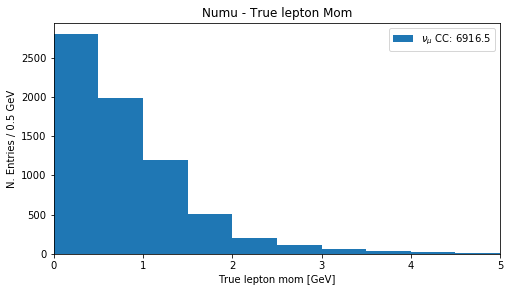

In [94]:
#Plot the truth data for numu

category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}

    
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(numu_mc_weights_tot_truth[str(c)][0])) \
            if sum(numu_mc_weights_tot_truth[str(c)][0]) else ""
            for c in numu_mc_vars_tot_truth.keys()
        ]


pup = list(numu_mc_vars_tot_truth.values())

i = 0
for c in numu_mc_vars_tot_truth.keys():
    numu_mc_vars_tot_truth[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot_truth.values())

i = 0
for c in numu_mc_weights_tot_truth.keys():
    numu_mc_weights_tot_truth[str(c)] = pup2[i][0]
    i = i + 1
        


numu_fig_truth = plt.figure(figsize=(8, 7))
numu_gs_truth = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1_truth = plt.subplot(numu_gs_truth[0])
numu_ax1_truth.set_xlim([0, 5])
#numu_ax1.set_ylim([0, 14000])

VARIABLE, BINS, RANGE, XTIT = 'targetP_asmuon',10,(0.0, 5.0),"True lepton mom [GeV]"

numu_stacked_truth = numu_ax1_truth.hist(
            numu_mc_vars_tot_truth.values(),
            weights=list(numu_mc_weights_tot_truth.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

#CATSEL
print(numu_stacked_truth[0])
n_numu_tot = numu_stacked_truth[0]

plt.title("Numu - True lepton Mom")
plt.xlabel("True lepton mom [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [95]:
numu_wanted_list_truth = n_numu_tot

dict_values([1745, 571, 99, 17, 0, 1, 0, 0, 0, 0])
<class 'dict_values'>


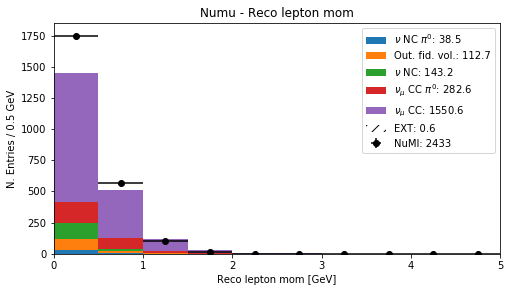

In [96]:
category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}


############################################# 
pup = list(numu_mc_vars_tot_reco.values())

i = 0
for c in numu_mc_vars_tot_reco.keys():
    numu_mc_vars_tot_reco[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot_reco.values())

i = 0
for c in numu_mc_weights_tot_reco.keys():
    numu_mc_weights_tot_reco[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot_reco.values())

i = 0
for c in numu_dirt_vars_tot_reco.keys():
    numu_dirt_vars_tot_reco[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_dirt_weights_tot_reco.values())

i = 0
for c in numu_dirt_weights_tot_reco.keys():
    numu_dirt_weights_tot_reco[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [numu_mc_vars_tot_reco, numu_dirt_vars_tot_reco]
weightss = [numu_mc_weights_tot_reco, numu_dirt_weights_tot_reco]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig_reco = plt.figure(figsize=(8, 7))
numu_gs_reco = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1_reco = plt.subplot(nue_gs_truth[0])
numu_ax1_reco.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'targetP_asMuon',10,(0.0, 5.0),"Reco lepton mom [GeV]"

numu_stacked_reco = numu_ax1_reco.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked_reco[0][-1])

n_ext_numu, ext_bins, patches = numu_ax1_reco.hist(
            numu_ext_vars_tot_reco[str(0)][0],
            weights=numu_ext_weights_tot_reco[str(0)][0],
            bottom=current_total_hist,
            label="EXT: %.1f" % (numu_ext_weights_tot_reco[str(0)][0]) if (numu_ext_weights_tot_reco[str(0)][0]) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

numu_ax1_reco.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

print(numu_data_vars_tot_reco[str(0)].values())
print(type(numu_data_vars_tot_reco[str(0)].values()))

numu_ax1_reco.errorbar(
            current_bincenters,
            numu_data_vars_tot_reco[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=nue_data_weights_tot_reco[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(numu_data_vars_tot_reco[str(0)].values()) if sum(numu_data_vars_tot_reco[str(0)].values()) else "")

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]

numu_ax1_reco.set_ylim([0, 1850])

plt.title("Numu - Reco lepton mom")
plt.xlabel("Reco lepton mom [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [97]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 3

numu_wanted_list_reco = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked_reco)

[0.0, 0.0, 0.08794184574992414, 0.040945293025288265]

SUMS
[38.54738979674231, 151.222499151408, 294.4026331273937, 576.9940121634313, 2127.579824975266]
[112.67510935466568, 143.1801339759857, 282.5913790360376, 1550.5858128118348]

Wanted List:
[1038.9428443232564, 385.38076123270366, 92.85406895535766, 24.746632317630656, 5.436371980059221, 2.9888485145052073, 0.14583588119967317, 0.04950431409815792, 0.040945293025288265, 0.0]



In [100]:
def plot_eff(selected, truth, bins, bin_centers, bin_width): 

    # plot selected signal events 
    #fig, ax1 = plt.subplots(figsize=(4, 5))
    current_fig = plt.figure(figsize=(8, 7))
    gs = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(gs[0])

    # compute efficiency
    eff = [ a/b for a, b in zip(selected, truth) ]
    eff_err = []
    for i in range(len(eff)):
        eff_err.append(math.sqrt( (eff[i]*(1-eff[i]))/truth[i] ) )
        print("In bin", i, ", eff = ", eff[i], " with error = ", eff_err[i])
        
    # compute bin centers 
    bc = bin_centers
    x_err = []
    for i in range(len(selected)): 
        x_err.append(bin_width/2)

    # plot efficiency
    #ax1 = ax1.twinx()
    ax1.errorbar(bc, eff, xerr=x_err, yerr=eff_err, fmt='o', color='orangered', ecolor='orangered', markersize=3) 
    ax1.set_ylim(0, 0.6)
    ax1.set_ylabel('Efficiency', fontsize=15)
    ax1.set_xlabel('Lepton Momentum [GeV]', fontsize=15)
    ax1.set_title("Selection Efficiency")
    #plt.text(2, 0.45, r'MicroBooNE In Progress')

    plt.show()
    
    #######Nue or Numu
    #current_fig.savefig("batch_eff_nue_fig_full_500_catsel_nopions_leptonMom.pdf")
    current_fig.savefig("batch_eff_numu_fig_full_500_catsel_nopions_leptonMom.pdf")

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
In bin 0 , eff =  0.22069986773784786  with error =  0.03466281266084928
In bin 1 , eff =  0.14340920027142792  with error =  0.02968012867891901
In bin 2 , eff =  0.07297793850720874  with error =  0.03598231003906285
In bin 3 , eff =  0.0608848098343054  with error =  0.054579501782249205
In bin 4 , eff =  0.04340042465834372  with error =  0.0716133263256886
In bin 5 , eff =  0.013319079667233518  with error =  0.05248326696895714
In bin 6 , eff =  0.012802406237166043  with error =  0.07360889607731923
In bin 7 , eff =  0.016823742729820606  with error =  0.11752379809949544
In bin 8 , eff =  0.04536965391572394  with error =  0.3433999621692684
In bin 9 , eff =  0.0  with error =  0.0


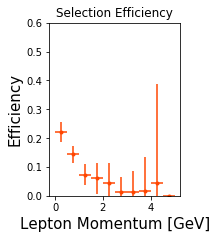

In [99]:
#Nue Selection Efficiency

bin_width = 0.5
bins = np.arange(0, 5.0, bin_width)
nue_bin_edges = np.arange(0, 5.5, bin_width)
print(nue_bin_edges)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])
print(nue_bincenters)

plot_eff(nue_wanted_list_reco, nue_wanted_list_truth, bins, nue_bincenters, bin_width)

In bin 0 , eff =  0.3709278192335409  with error =  0.00912733137208185
In bin 1 , eff =  0.1939640385645328  with error =  0.008870608496620844
In bin 2 , eff =  0.07802722379297479  with error =  0.007775077629692121
In bin 3 , eff =  0.0488872415366008  with error =  0.009584147386996018
In bin 4 , eff =  0.027089401422208757  with error =  0.011459912280522287
In bin 5 , eff =  0.02645761687288437  with error =  0.015099974117022708
In bin 6 , eff =  0.0023758578841086703  with error =  0.006214007014115924
In bin 7 , eff =  0.001394065127593755  with error =  0.006261214915050712
In bin 8 , eff =  0.0023336610735842926  with error =  0.011519362628414076
In bin 9 , eff =  0.0  with error =  0.0


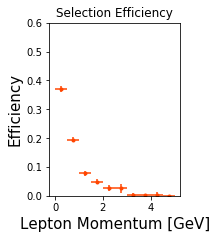

In [101]:
#Numu Selection Efficiency

bin_width = 0.5
bins = np.arange(0, 5.0, bin_width)
numu_bin_edges = np.arange(0, 5.5, bin_width)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])

plot_eff(numu_wanted_list_reco, numu_wanted_list_truth, bins, numu_bincenters, bin_width)

In [104]:
def plot_purity(selected, total_selected, bins, bin_centers, bin_width): 

    # plot selected signal events 
    #fig, ax1 = plt.subplots(figsize=(4, 5))
    current_fig = plt.figure(figsize=(8, 7))
    gs = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(gs[0])

    # compute efficiency
    eff = [ a/b for a, b in zip(selected, total_selected) ]
    eff_err = []
    for i in range(len(eff)):
        eff_err.append(math.sqrt( (eff[i]*(1-eff[i]))/total_selected[i] ) )
        print("In bin", i, ", eff = ", eff[i], " with error = ", eff_err[i])
        
    # compute bin centers 
    bc = bin_centers
    x_err = []
    for i in range(len(selected)): 
        x_err.append(bin_width/2)

    # plot efficiency
    #ax1 = ax1.twinx()
    ax1.errorbar(bc, eff, xerr=x_err, yerr=eff_err, fmt='o', color='orangered', ecolor='orangered', markersize=3) 
    ax1.set_ylim(0, 1.00)
    ax1.set_ylabel('Purity', fontsize=15)
    ax1.set_xlabel('Lepton Momentum [GeV]', fontsize=15)
    ax1.set_title("Selection Purity")
    #plt.text(-0.2, 0.25, r'MicroBooNE In Progress')

    plt.show()
    
    #######Nue or Numu
    #current_fig.savefig("batch_pur_nue_fig_full_500_catsel_nopions_leptonMom.pdf")
    current_fig.savefig("batch_pur_numu_fig_full_500_catsel_nopions_leptonMom.pdf")

[4.07412192e+01 2.39658771e+01 5.12538064e+00 1.72544524e+00
 4.67528661e-01 1.45953395e-01 2.98625360e-02 2.01476771e-02
 2.54681095e-02 0.00000000e+00]
In bin 0 , eff =  0.7754383469992614  with error =  0.06537691515174347
In bin 1 , eff =  0.8344542783436568  with error =  0.07592129183010922
In bin 2 , eff =  0.743993336148319  with error =  0.19277339501684113
In bin 3 , eff =  0.6772928008918578  with error =  0.35591145567615184
In bin 4 , eff =  0.7514882751625431  with error =  0.632019425126497
In bin 5 , eff =  0.43538076655426616  with error =  1.2977927779860607
In bin 6 , eff =  1.0  with error =  0.0
In bin 7 , eff =  1.0  with error =  0.0
In bin 8 , eff =  0.6542880277354455  with error =  2.980185807380591
In bin 9 , eff =  nan  with error =  nan


/tmp/ipykernel_8024/3400787531.py:10: RuntimeWarning: invalid value encountered in double_scalars
  eff = [ a/b for a, b in zip(selected, total_selected) ]


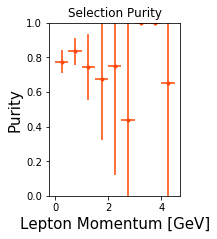

In [103]:
#Nue Selection Purity

bin_width = 0.5
bins = np.arange(0, 5.0, bin_width)
nue_bin_edges = np.arange(0, 5.5, bin_width)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])

current_total_hist = (nue_stacked_reco[0][-1])

full_total_hist_reco = current_total_hist + n_ext_nue

print(full_total_hist_reco)

plot_purity(nue_wanted_list_reco, full_total_hist_reco, bins, nue_bincenters, bin_width)

[1.45338204e+03 5.14622203e+02 1.17699254e+02 3.11813662e+01
 7.09070658e+00 3.44174021e+00 4.66061720e-01 1.28778813e-01
 1.28887139e-01 0.00000000e+00]
In bin 0 , eff =  0.7148449740713182  with error =  0.011842858907165493
In bin 1 , eff =  0.7488615128465584  with error =  0.0191167091512736
In bin 2 , eff =  0.7889095808176922  with error =  0.03761499614425965
In bin 3 , eff =  0.7936352816969073  with error =  0.07247373407913442
In bin 4 , eff =  0.7666897396810425  with error =  0.1588297995230445
In bin 5 , eff =  0.8684120048244609  with error =  0.18221410892682186
In bin 6 , eff =  0.3129110905216668  with error =  0.6791961732240013
In bin 7 , eff =  0.38441349874158803  with error =  1.355569066204031
In bin 8 , eff =  0.3176833112627283  with error =  1.2968370390957145
In bin 9 , eff =  nan  with error =  nan


/tmp/ipykernel_8024/1975426711.py:10: RuntimeWarning: invalid value encountered in double_scalars
  eff = [ a/b for a, b in zip(selected, total_selected) ]


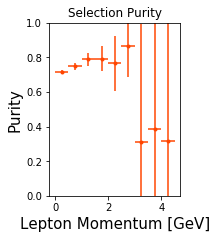

In [105]:
#Numu Selection Purity

bin_width = 0.5
bins = np.arange(0, 5.0, bin_width)
numu_bin_edges = np.arange(0, 5.5, bin_width)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])

current_total_hist = (numu_stacked_reco[0][-1])

full_total_hist_reco = current_total_hist + n_ext_numu

print(full_total_hist_reco)

plot_purity(numu_wanted_list_reco, full_total_hist_reco, bins, numu_bincenters, bin_width)